# Import dependencies

In [8]:
import pandas as pd
import numpy as np
import json
import io
import datetime as dt
import string
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

import spacy
import en_core_web_sm
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz
nlp = en_core_web_sm.load()
# nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

import re
from bs4 import BeautifulSoup


from gensim import corpora, models, similarities

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import gzip
import pprint
import time
import seaborn as sns
import sklearn.datasets
from sklearn import tree, neighbors
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import itertools as it
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Read in data

In [59]:
hash_words = dict()
hash_words_list = []

with gzip.open('gamergate.json.gz','rb') as f:
    for line in f:
        status = json.loads(line)
        

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:01:01 +0000 2014',
 'entities': {'hashtags': [{'indices': [81, 91], 'text': 'GamerGate'}],
              'media': [{'display_url': 'pic.twitter.com/5D3OMkwOfd',
                         'expanded_url': 'https://twitter.com/misterbrilliant/status/523127956492009472/photo/1',
                         'id': 523127953383624704,
                         'id_str': '523127953383624704',
                         'indices': [92, 114],
                         'media_url': 'http://pbs.twimg.com/media/B0KGGhmCEAAHVhb.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/B0KGGhmCEAAHVhb.jpg',
                         'sizes': {'large': {'h': 409,
                                             'resize': 'fit',
                                             'w': 545},
                                   'medium': {'h': 409,
                                              'resize': 'fit',
                    

 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524349480246587392,
 'id_str': '524349480246587392',
 'in_reply_to_screen_name': 'MagickalFeline',
 'in_reply_to_status_id': 524348693655601153,
 'in_reply_to_status_id_str': '524348693655601153',
 'in_reply_to_user_id': 18146977,
 'in_reply_to_user_id_str': '18146977',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "@canar Mercedes-Benz didn't even revert. Just another bit of "
         'nonsense that somehow got published. Ethics. #gamergate '
         '#notyourshield',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sat Feb 12 09:53:41 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'RETWEETS ARE NOT NECESSARILY ENDORSEMENTS. #OPSkynet',
          'entities': {'description':

                                   'urls': [{'display_url': 'twitter.com/wikileaks/stat…',
                                             'expanded_url': 'https://twitter.com/wikileaks/status/507605952841797632',
                                             'indices': [121, 144],
                                             'url': 'https://t.co/StfeyZSuMg'}],
                                   'user_mentions': []},
                      'favorite_count': 954,
                      'favorited': False,
                      'geo': None,
                      'id': 511727048931282944,
                      'id_str': '511727048931282944',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': True,
                      'lang': 'en',
     

                         'My gab Account:  https://t.co/u3b6i8VyGo',
          'entities': {'description': {'urls': [{'display_url': 'gab.ai/Mister_Havoc',
                                                 'expanded_url': 'https://gab.ai/Mister_Havoc',
                                                 'indices': [76, 99],
                                                 'url': 'https://t.co/u3b6i8VyGo'}]}},
          'favourites_count': 19890,
          'follow_request_sent': False,
          'followers_count': 536,
          'following': False,
          'friends_count': 917,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2492324996,
          'id_str': '2492324996',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 16,
          'location': '',
          'name': 'Tanks tanks tank',
          'notifications': False,
          'profile_background_color': 'C0DEED',
      

                         'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                         'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                         'sizes': {'large': {'h': 1146,
                                             'resize': 'fit',
                                             'w': 1952},
                                   'medium': {'h': 705,
                                              'resize': 'fit',
                                              'w': 1200},
                                   'small': {'h': 399,
                                             'resize': 'fit',
                                             'w': 680},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524338462355234816,
                         'source_status_id_str': '52

                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'},
                                {'id': 21540556,
                                 'id_str': '21540556',
                                 'indices': [118, 131],
                                 'name': 'Caitlin Dewey Rainwater',
                                 'screen_name': 'caitlindewey'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524349392296615936,
 'id_str': '524349392296615936',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 205,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:45:48

                                                       'sizes': {'large': {'h': 528,
                                                                           'resize': 'fit',
                                                                           'w': 1229},
                                                                 'medium': {'h': 516,
                                                                            'resize': 'fit',
                                                                            'w': 1200},
                                                                 'small': {'h': 292,
                                                                           'resize': 'fit',
                                                                           'w': 680},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                            

                                             'expanded_url': 'http://www.twitlonger.com/show/n_1sd8oem?new_post=true',
                                             'indices': [85, 107],
                                             'url': 'http://t.co/3YT7oNP3j0'}],
                                   'user_mentions': [{'id': 2822140591,
                                                      'id_str': '2822140591',
                                                      'indices': [111, 126],
                                                      'name': 'Andre M.',
                                                      'screen_name': 'OdinRunemaster'}]},
                      'favorite_count': 8,
                      'favorited': False,
                      'geo': None,
                      'id': 524348938045104129,
                      'id_str': '524348938045104129',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
             

          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'ko-fi.com/hershellinkton',
                                         'expanded_url': 'http://ko-fi.com/hershellinkton',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/PazSKhiHvN'}]}},
          'favourites_count': 57654,
          'follow_request_sent': False,
          'followers_count': 647,
          'following': False,
          'friends_count': 658,
          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 37632528,
          'id_str': '37632528',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'de',
          'listed_count': 24,
          'location': 'Termina/ Offenbach /Mond',
          'name': 'Kawaii Doggo, Felltragender Mutterficker',
          'notifications': False,
          'profile_background_color': '000000',
    

 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 205,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:45:48 +0000 2014',
                      'entities': {'hashtags': [{'indices': [91, 101],
                                                 'text': 'Gamergate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'washingtonpost.com/news/the-inter…',
                                             'expanded_url': 'http://www.washingtonpost.com/news/the-intersect/wp/2014/10/14/the-only-guide-to-gamergate-you-will-ever-need-to-read/',
                                             'indices': [117, 139],
                                             'url': 'http://t.co/IL8Rbr7iX6'}],
                                   'user_mentions': [{'

                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 13,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': '@josswhedon if you think #GamerGate means hate, '
                              "then you've been misled by the very "
                              'self-appointed censors who would happily come '
                              'after YOU.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sun Mar 15 23:43:46 +0000 2009',
                               'default_profile': False,
                               'default_profile_image': False,
                          

                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/602986029478498304/nnVb6Meg_normal.jpg',
                               'profile_link_color': '1DA1F2',
                               'profile_sidebar_border_color': 'C0DEED',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'Ncrdrg',
                               'statuses_count': 29186,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'http://t.co/yJfuWVHtjj',
                               'utc_offset': -14400,
                               'verified': False}},
 'source': '<a href="https://about.twitter.com/products/twee

          'profile_image_url': 'http://pbs.twimg.com/profile_images/518937599155507200/VGs2IvAE_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/518937599155507200/VGs2IvAE_normal.png',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Gamersbiteback',
          'statuses_count': 1145,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/438478692453339136/qZPnv5kc_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/438478692453339136/qZPnv5kc_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_us

                                   'urls': [],
                                   'user_mentions': [{'id': 430338983,
                                                      'id_str': '430338983',
                                                      'indices': [0, 14],
                                                      'name': 'Eat the Rich',
                                                      'screen_name': 'TheMagicLemur'}]},
                      'favorite_count': 1,
                      'favorited': False,
                      'geo': None,
                      'id': 524349188843126785,
                      'id_str': '524349188843126785',
                      'in_reply_to_screen_name': 'TheMagicLemur',
                      'in_reply_to_status_id': 524348775121551361,
                      'in_reply_to_status_id_str': '524348775121551361',
                      'in_reply_to_user_id': 430338983,
                      'in_reply_to_user_id_str': '430338983',
                  

 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://geekking.in" rel="nofollow">_GeekKing</a>',
 'text': 'So Long #Gamergate. What Did You Teach Us? http://t.co/mNN0dTFIfm '
         '#Tech (via @TechQ_tl)',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Aug 08 09:41:06 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Chief Editor & Founder @ http://t.co/1R3mCdVICn, '
                         'News fanatic, photographer, nature lover.',
          'entities': {'description': {'urls': [{'display_url': 'IBNMoney.com',
                                                 'expanded_url': 'http://IBNMoney.com',
                                                 'indices': [25, 47],
                                                 'url': 'http://t.co/1R3mCdVICn'}]}},
          'favourites_count': 18,
          'follow_request_

                                                        'medium': {'h': 199,
                                                                   'resize': 'fit',
                                                                   'w': 640},
                                                        'small': {'h': 199,
                                                                  'resize': 'fit',
                                                                  'w': 640},
                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/zqHG6VB8NR'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_menti

                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'For the love of god STOP ADDING THE WORD GATE '
                              'TO THINGS.  IT MAKES YOU LOOK STUPID '
                              '#tabletopgate #gamergate #elevatorgate '
                              '#gategate',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Nov 23 19:50:14 +0000 2009',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'An engineer with secret plans '
                                              'to take over the world with '
                                              'SCIENCE.',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 4940,
               

                                 'screen_name': 'LibertarianBlue'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524349414908108801,
 'id_str': '524349414908108801',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 72,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:51:27 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'freebeacon.com/blog/gamergate…',
                                             'expanded_url': 'http://freeb

          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/517753470888079360/BfHCbRfO.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/517753470888079360/BfHCbRfO.jpeg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/308407039/1513295072',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/925569176080543745/AmO0xwkx_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/925569176080543745/AmO0xwkx_normal.jpg',
          'profile_link_color': 'DD2E44',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'PeterNo0ne',
          'statuses_count': 14618,
          'time_zone': 'Pacific Time (US &

                                                      'id_str': '8936082',
                                                      'indices': [70, 77],
                                                      'name': 'Gawker',
                                                      'screen_name': 'Gawker'},
                                                     {'id': 2467791,
                                                      'id_str': '2467791',
                                                      'indices': [81, 96],
                                                      'name': 'Washington Post',
                                                      'screen_name': 'washingtonpost'},
                                                     {'id': 21540556,
                                                      'id_str': '21540556',
                                                      'indices': [129, 142],
                                                      'name': 'Caitlin Dewey '
        

                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/LSxmTsFMN3'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/LSxmTsFMN3',
                                                       'expanded_url': 'https://twitter.com/mistertodd/status/523823039515856898/photo/1',
                                                       'id': 523823037536149505,
                                                       'id_str': '523823037536149505',
                                                       'i

         'http://t.co/En4wCb1cKN',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Apr 01 23:21:18 +0000 2009',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Southern born Manchester based video and social '
                         'media guy.\n'
                         'Brett from GameByte.\n'
                         'Arsenal and video game fan. Views are my own.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'bit.ly/gamebyteyoutube',
                                         'expanded_url': 'http://bit.ly/gamebyteyoutube',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/517dTHOEab'}]}},
          'favourites_count': 5440,
          'follow_request_sent': False,
          'followers_count': 1475,
          'following': False,
          'friends_cou

          'description': 'No Bio',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'NoWebsite.com',
                                         'expanded_url': 'http://NoWebsite.com',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/0VvErglI4m'}]}},
          'favourites_count': 103775,
          'follow_request_sent': False,
          'followers_count': 893,
          'following': False,
          'friends_count': 1989,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2801269189,
          'id_str': '2801269189',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 21,
          'location': 'No Location',
          'name': 'No Name',
          'notifications': False,
          'profile_background_color': 'DD2E44',
          'profile_background_

                                            'url': {'urls': [{'display_url': 'wikileaks.org',
                                                              'expanded_url': 'https://wikileaks.org',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/maw0wih6t6'}]}},
                               'favourites_count': 90,
                               'follow_request_sent': False,
                               'followers_count': 5590360,
                               'following': False,
                               'friends_count': 7523,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 16589206,
                               'id_str': '16589206',
                               'is_translation_enabl

          'profile_image_url': 'http://pbs.twimg.com/profile_images/378800000014331702/b89ed6b280608208bbbd1c7a1d45ba16_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/378800000014331702/b89ed6b280608208bbbd1c7a1d45ba16_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'mmbgd1',
          'statuses_count': 104846,
          'time_zone': None,
          'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:01:09 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'via.ba

                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': "HEY SJW'S \n"
                              '\n'
                              ':3\n'
                              '\n'
                              '***MY HUGBOX*** \n'
                              '\n'
                              'IS BIGGER :3\n'
                              '\n'
                              '#GamerGate \n'
                              '\n'
                              '#DealWithIt http://t.co/Bo5vsbjN78',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Sep 17 17:29:49 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'MY

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2841886099/1412559600',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/518937599155507200/VGs2IvAE_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/518937599155507200/VGs2IvAE_normal.png',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Gamersbiteback',
          'statuses_count': 1145,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:01:45 +0000 2014',
 'entities': {'hashtags': [{'indices': [24, 34], 'text': 'Gamergate'}]

                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/5K5slQZkPU'}]},
                      'favorite_count': 8,
                      'favorited': False,
                      'geo': None,
                      'id': 524331794091343872,
                      'id_str': '524331794091343872',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 12,
                      'retweeted': False,


                                                                      'indices': [32,
                                                                                  55],
                                                                      'url': 'https://t.co/676V6mooDV'}]},
                                            'url': {'urls': [{'display_url': 'wikileaks.org',
                                                              'expanded_url': 'https://wikileaks.org',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/maw0wih6t6'}]}},
                               'favourites_count': 90,
                               'follow_request_sent': False,
                               'followers_count': 5590360,
                               'following': False,
                               'friends_c

 'created_at': 'Tue Oct 21 00:01:22 +0000 2014',
 'entities': {'hashtags': [{'indices': [33, 43], 'text': 'Gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 6160792,
                                 'id_str': '6160792',
                                 'indices': [65, 70],
                                 'name': 'Milo Yiannopoulos ひ✘',
                                 'screen_name': 'Nero'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524349689672769536,
 'id_str': '524349689672769536',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 2,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:59:10 +0000 2014',
    

                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/smLuJC0DE0'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'goo.gl/8BTgcw',
                                             'expanded_url': 'http://goo.gl/8BTgcw',
                                             'indices': [81, 103],
                                             'url': 'http://t.co/7ZOBTXmTzJ'}],
                                   'user_mentions': [{'id': 17681505,
                                                      'id_str': '17681505',
                                                      'indices': [24, 33],
                                      

                                              'American Enterprise Institute. '
                                              'Former philosophy professor. '
                                              'Author of Who Stole Feminism? '
                                              'Host of video blog: The Factual '
                                              'Feminist.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,


                                            'url': {'urls': [{'display_url': 'pixelblock.tumblr.com',
                                                              'expanded_url': 'http://www.pixelblock.tumblr.com',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/RW8DTCWDMG'}]}},
                               'favourites_count': 17052,
                               'follow_request_sent': False,
                               'followers_count': 1593,
                               'following': False,
                               'friends_count': 1117,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 574962273,
                               'id_str': '574962273',
                               

                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 56448,
                               'location': 'Everywhere',
                               'name': 'WikiLeaks',
                               'notifications': False,
                               'profile_background_color': '9AE4E8',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/3147857/WL_Hour_Glass.jpg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/3147857/WL_Hour_Glass.jpg',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/16589206/1402313050',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/512138307870785536/Fe00yVS2_normal.png',
                    

                      'favorited': False,
                      'geo': None,
                      'id': 524348019148591104,
                      'id_str': '524348019148591104',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com/#!/download/ipad" '
                                'rel="nofollow">Twitter for iPad</a>',
                      'text': '#GamerGate is diverse.Lots of lefties,liberals, '
                              '&amp; moderates. When @Gawker or '
                              '@washingtonpo

                                                                          23],
                                                              'url': 'https://t.co/cJIqavoHOt'}]}},
                               'favourites_count': 1877,
                               'follow_request_sent': False,
                               'followers_count': 382939,
                               'following': False,
                               'friends_count': 138959,
                               'geo_enabled': True,
                               'has_extended_profile': False,
                               'id': 15947185,
                               'id_str': '15947185',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 17268,
                               'location': 'Minnesota, USA',
                               'name': 'Tweet

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/293965839/1504032194',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/902349997693337600/q4gGuyj4_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/902349997693337600/q4gGuyj4_normal.jpg',
          'profile_link_color': '1B95E0',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'iam_petr',
          'statuses_count': 48969,
          'time_zone': 'Quito',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:02:01 +0000 2014',
 'entities': {'hashtags': [{'indices': [43, 53], 'text': 'GamerGate'}],
              'symbols':

                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'CHSommers',
                               'statuses_count': 30782,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/PXmEjtqRmU',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @CHSommers: #GamerGate is diverse.Lots of lefties,liberals, &amp; '
         'moderates. When @Gawker or @washingtonpost attack, they attack own '
         'readers…',
 'truncated': False,
 'user': {'contributors_enabled': False,
      

                                            'small': {'h': 250,
                                                      'resize': 'fit',
                                                      'w': 500},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'type': 'animated_gif',
                                  'url': 'http://t.co/LmMoVCTmzo',
                                  'video_info': {'aspect_ratio': [2, 1],
                                                 'variants': [{'bitrate': 0,
                                                               'content_type': 'video/mp4',
                                                               'url': 'https://video.twimg.com/tweet_video/B0bdZe6CEAAJ-j5.mp4'}]}}]},
 'favorite_count': 2,
 'favorited': False,
 'geo': None,
 'id': 524349859860471808,
 'id_str': '

 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524350072788881408,
 'id_str': '524350072788881408',
 : False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 6,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'Wow just did a search on #gamergate &amp; the '
                              'hashtag has been mentioned 2.8 million times on '
                              '@twitter since August.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Fri Jan 07 16:59:58 +0000 2011',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Lover of awes

                               'profile_sidebar_border_color': '000000',
                               'profile_sidebar_fill_color': '000000',
                               'profile_text_color': '000000',
                               'profile_use_background_image': False,
                               'protected': False,
                               'screen_name': 'Zarren364',
                               'statuses_count': 26288,
                               'time_zone': 'Central Time (US & Canada)',
                               'translator_type': 'none',
                               'url': None,
                               'utc_offset': -18000,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "RT @Zarren364: So, Zoe Quinn isn't going anywhere? \n"
         'https://t.co/kVyzeQWcdq\n'
         '\n'
         "#gamergate sure doesn't.",
 'truncated': False,
 'user': {'contributo

                                         'expanded_url': 'http://theragingfanboy.wordpress.com',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/z5ntFAKMnB'}]}},
          'favourites_count': 65441,
          'follow_request_sent': False,
          'followers_count': 2851,
          'following': False,
          'friends_count': 3915,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 374227012,
          'id_str': '374227012',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 80,
          'location': 'Canada',
          'name': 'Lunar Archivist',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/th

                               'protected': False,
                               'screen_name': 'GamingAndPandas',
                               'statuses_count': 151669,
                               'time_zone': 'Jerusalem',
                               'translator_type': 'none',
                               'url': 'https://t.co/1fbaSNWiQV',
                               'utc_offset': 10800,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "RT @GamingAndPandas: Take heart, #GamerGate. Apparently, we've "
         'gained a friend in a very, VERY high place. Keep speaking the truth. '
         'Share t…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Sep 15 23:01:18 +0000 2011',
          'default_profile': True,
          'default_profile_image': False,
          'description': "Groucho Marxist. My preferred pronoun is 'mog', "
            

                       'url': {'urls': [{'display_url': 'tytnetwork.com',
                                         'expanded_url': 'http://tytnetwork.com',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/nG6g1pXgmk'}]}},
          'favourites_count': 1351,
          'follow_request_sent': False,
          'followers_count': 110376,
          'following': False,
          'friends_count': 188,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 393588826,
          'id_str': '393588826',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 1229,
          'location': 'Los Angeles',
          'name': 'TYT Network',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/378800000055840710/d1

                                             'w': 658},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524295376849739776,
                         'source_status_id_str': '524295376849739776',
                         'source_user_id': 14931637,
                         'source_user_id_str': '14931637',
                         'type': 'photo',
                         'url': 'http://t.co/yUU1FQ1KKd'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 14931637,
                                 'id_str': '14931637',
                                 'indices': [3, 14],
                                 'name': 'Matt Binder',
                                 'screen_name': 'MattBinder'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/yUU1FQ1KKd',
       

                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'MattBinder',
                               'statuses_count': 41669,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/c4yPW4JRNL',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="https://about.twitter.com/products/tweetdeck" '
           'rel="nofollow">TweetDeck</a>',
 'text': 'RT @MattBinder: #gamergate http://t.co/4iEBRorSCu',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Apr 04 16:02:54 +0000 2008',
          'default_profile': False,

                                 'screen_name': 'MildlyAmused'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524350309716733952,
 'id_str': '524350309716733952',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 1463,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Wed Oct 15 15:01:13 +0000 2014',
                      'entities': {'hashtags': [{'indices': [14, 24],
                                                 'text': 'GamerGate'},
                                                {'indices': [63, 81],
                                                 'text': 'StopGamerGate2014'}],
                                   'media': [{'display_url': 'pic.twi

 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': 'So this #gamergate stuff is still going on eh? Good stuff, I support '
         'it though not very active with it.',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Jan 16 18:25:32 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Seeker of truth, knowledge, bad jokes and self '
                         'improvement.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'youtube.com/user/xMephista…',
                                         'expanded_url': 'https://www.youtube.com/user/xMephistanx',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/k9oibWORu3'}]}},
          'favourites_count': 1345,
        

                               'statuses_count': 13676,
                               'time_zone': 'Atlantic Time (Canada)',
                               'translator_type': 'none',
                               'url': 'http://t.co/2xKUUYjl41',
                               'utc_offset': -10800,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @Toshi_TNE: #GamerGate Show them how tired we are. '
         'http://t.co/We0IRAngN6',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Dec 30 21:27:50 +0000 2010',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Grand Empress of Aniworld Core Design. Gaming is my '
                         '#1 love. Technology, Anime and Art is also important '
                         'too.',
          'entities': {'description': {'urls': []},
                     

                                 'screen_name': 'washingtonpost'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524350201012953088,
 'id_str': '524350201012953088',
 'in_reply_to_screen_name': 'CHSommers',
 'in_reply_to_status_id': 524345772138311680,
 'in_reply_to_status_id_str': '524345772138311680',
 'in_reply_to_user_id': 334921581,
 'in_reply_to_user_id_str': '334921581',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': '@CHSommers Narrow-minded &amp; dogmatic 4 @caitlindewey 2 '
         'characteriz all of #GamerGate as "misogynists, anti-feminists, '
         'trolls" @washingtonpost',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon May 27 01:51:30 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Retired electr

                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed May 28 07:59:20 +0000 2008',
                               'default_profile': True,
                               'default_profile_image': False,
                               'description': 'video producer, host, & writer. '
                                              'currently: DOOMED with Matt '
                                              'Binder // previously: '
                                              '@CAFEdotcom, @MajorityFM // '
                                              'email: matt@xmattx.com',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'doomedpod.com',
                                                              'expanded_url': 'http://www.doomedpod.com',
                                                              'indices': [0,
            

                               'id_str': '17325645',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 44,
                               'location': 'Flyover Country, USA',
                               'name': 'Rachael Rūaumoko',
                               'notifications': False,
                               'profile_background_color': '000000',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/17325645/1454932271',
                               'profile_image_url': 'http://pbs.t

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1874836183/1487593159',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/926154139414831104/1_crVsqN_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/926154139414831104/1_crVsqN_normal.jpg',
          'profile_link_color': '264491',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'N7IRL',
          'statuses_count': 614332,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:03:07 +0000 2014',
 'entities': {'hashtags': [{'indices': [40, 50], 'text': 'GamerGate'}],
     

                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 172,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': "Take heart, #GamerGate. Apparently, we've "
                              'gained a friend in a very, VERY high place. '
                              'Keep speaking the truth. Share the damning '
                              'evidence.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Feb 07 02:40:30

                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com/#!/download/ipad" '
                                'rel="nofollow">Twitter for iPad</a>',
                      'text': '#GamerGate is diverse.Lots of lefties,liberals, '
                              '&amp; moderates. When @Gawker or '
                              '@washingtonpost attack, they attack own '
                              'readers.@caitlindewey',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Jul 13 21:41:29 +0000 2011',
                               'default_profile': True,
                               'default_profile_image': False,
         

          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Blaugast',
          'statuses_count': 181531,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:04:44 +0000 2014',
 'entities': {'hashtags': [{'indices': [60, 70], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2780075550,
                                 'id_str': '2780075550',
                                 'indices': [3, 19],
                                 'name': 'Linearly Independent',
                                 'screen_name': 'JoachimRussells'},
              

          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/3782497707/b1e3d5e81a32320ecabd20671f4000c8_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/3782497707/b1e3d5e81a32320ecabd20671f4000c8_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Bent0916',
          'statuses_count': 5549,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:04:40 +0000 2014',
 'entities': {'hashtags': [{'indices': [107, 117], 'text': 'GamerGate'}],
              'symb

                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 2094,
                               'location': 'Washington, DC',
                               'name': 'Christina Sommers',
                               'notifications': False,
                               'profile_background_color': 'C0DEED',
                               'profile_ba

                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/En4wCb1cKN'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/En4wCb1cKN',
                                                       'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                                                       'id': 524338461512200192,
                                                       'id_str': '524338461512200192',
                                                       'indices': [101, 123],
                                                       

                      'retweet_count': 198,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
                      'text': '#GamerGate Show them how tired we are. '
                              'http://t.co/We0IRAngN6',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sat Jun 26 03:45:00 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'https://t.co/RKJuw4mblp',
                               'entities': {'description': {'urls': [{'display_url': 'toshitne.deviantart.com',
                                                                      'expanded_url': 'http://toshitne.devian

          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'N7IRL',
          'statuses_count': 614332,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:05:01 +0000 2014',
 'entities': {'hashtags': [{'indices': [89, 99], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'id': 524350608611229698,
 'id_str': '524350608611229698',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': Fa

 'text': 'RT @MattBinder: oh look another #GamerGate hero who found an '
         'opportunity to take advantage of the poor saps '
         'http://t.co/yUU1FQ1KKd',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Jan 29 00:52:10 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'NEIT ‘18 I am very tired.',
          'entities': {'description': {'urls': []}},
          'favourites_count': 399,
          'follow_request_sent': False,
          'followers_count': 121,
          'following': False,
          'friends_count': 462,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 1129642452,
          'id_str': '1129642452',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 2,
          'location': 'United States',
          'name': 'Tyler Skoglund',
          'notifica

                      'user': {'contributors_enabled': False,
                               'created_at': : 6,
          'location': '',
          'name': 'morrman',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/483419710/1500558618',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/967183259925872640/FqO-krWb_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/967183259925872640/FqO-krWb_normal.jpg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
       

                                              'https://t.co/oImIh3uXqM, '
                                              '@playfic, @supercutorg, Kind of '
                                              'Bloop. Helped build '
                                              '@kickstarter. he/him/his',
                               'entities': {'description': {'urls': [{'display_url': 'belong.io',
                                                                      'expanded_url': 'http://belong.io',
                                                                      'indices': [35,
                                                                                  58],
                                                                      'url': 'https://t.co/oImIh3uXqM'}]},
                                            'url': {'urls': [{'display_url': 'waxy.org',
                                                              'expanded_url': 'https://waxy.org/',
                              

                               'has_extended_profile': False,
                               'id': 42082673,
                               'id_str': '42082673',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 67,
                               'location': 'The Ecclesiarchy -swiss cheese',
                               'name': 'Canoness Julie',
                               'notifications': False,
                               'profile_background_color': 'FF6699',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530926976723214336/9aw5YuQP.jpeg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/530926976723214336/9aw5YuQP.jpeg',
                               'profile_background_tile': True,
  

                              'FUCK YOUR CLICKBAIT AND LACK OF ETHICS \n'
                              '#TheFireRises',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Sep 17 17:29:49 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'MY WAIFU IS KURISU MAKISE & '
                                              'AKIYAMA MIO. MY PRONOUNS ARE '
                                              'CAPS/CAPSIE/CAPSSELF',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'youtube.com/watch?v=loB4i-…',
                                                              'expanded_url': 'https://www.youtube.com/watch?v=loB4i-YFdmA',
                                             

                                 'id_str': '42082673',
                                 'indices': [3, 15],
                                 'name': 'Canoness Julie',
                                 'screen_name': 'milky_candy'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524350391149162496,
 'id_str': '524350391149162496',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 10,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:58:23 +0000 2014',
                      'entities': {'hashtags': [{'indices': [73, 83],
                                                 'text': 'GAMERGATE'}],
                                   'symbols': [],
    

 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 351,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:54:44 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 8936082,
                                                      'id_str': '8936082',
                                                      'indices': [70, 77],
                                                      'name': 'Gawker',
                                                      'screen_name': 'Gawker'},
                                                     {'id': 2467791,
                                                      'id_str':

                                                                      'expanded_url': 'http://toshitne.deviantart.com/',
                                                                      'indices': [0,
                                                                                  23],
                                                                      'url': 'https://t.co/RKJuw4mblp'}]},
                                            'url': {'urls': [{'display_url': 'toshitne.imgur.com',
                                                              'expanded_url': 'http://toshitne.imgur.com',
                                                              'indices': [0,
                                                                          22],
                                                              'url': 'http://t.co/2xKUUYjl41'}]}},
                               'favourites_count': 6776,
                               'follow_request_sent': False,
                     

                                 'name': 'Sam Biddle',
                                 'screen_name': 'samfbiddle'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524350471914659840,
 'id_str': '524350471914659840',
 'in_reply_to_screen_name': 'johnmarkley',
 'in_reply_to_status_id': 524326972948623360,
 'in_reply_to_status_id_str': '524326972948623360',
 'in_reply_to_user_id': 14987233,
 'in_reply_to_user_id_str': '14987233',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': "@johnmarkley @BeninCitizen @samfbiddle Are you sure you're not just "
         'a member of GNAA trolling #Gamergate? You tweet like it.',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Sep 09 18:05:50 +0000 2011',
          'default_profile': False,
          'default_profile_image

                                                 'text': 'notyourshield'},
                                                {'indices': [129, 139],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 25,
                      'favorited': False,
                      'geo': None,
                      'id': 524342396453015552,
                      'id_str': '524342396453015552',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
            

                         'url': 'http://t.co/sGlkWXOiwS'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 16589206,
                                 'id_str': '16589206',
                                 'indices': [11, 21],
                                 'name': 'WikiLeaks',
                                 'screen_name': 'wikileaks'},
                                {'id': 2275538935,
                                 'id_str': '2275538935',
                                 'indices': [84, 99],
                                 'name': 'R O G U E ▵ ☆ ',
                                 'screen_name': 'RogueStarGamez'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/sGlkWXOiwS',
                                  'expanded_url': 'https://twitter.com/SerialExpansion/status/524350882574393345/photo/1',
                                  'id': 524350874949140480,
                                  'id_str': '52435087494914

                                                                      'expanded_url': 'http://belong.io',
                                                                      'indices': [35,
                                                                                  58],
                                                                      'url': 'https://t.co/oImIh3uXqM'}]},
                                            'url': {'urls': [{'display_url': 'waxy.org',
                                                              'expanded_url': 'https://waxy.org/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/5hXiECYLaU'}]}},
                               'favourites_count': 20264,
                               'follow_request_sent': False,
                               'followers_count': 3

                               'translator_type': 'none',
                               'url': 'https://t.co/c4yPW4JRNL',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @MattBinder: so i wrote about the #GamerGate grifters for '
         '@BoingBoing http://t.co/axRxDHUF5X',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Aug 26 22:58:39 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Princess Dagger',
          'entities': {'description': {'urls': []}},
          'favourites_count': 6097,
          'follow_request_sent': False,
          'followers_count': 23,
          'following': False,
          'friends_count': 88,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2771608093,
      

          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 738,
          'location': 'Seattle',
          'name': 'Will Seattle 🌦♻️',
          'notifications': False,
          'profile_background_color': 'BADFCD',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme12/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme12/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/16645396/1509466711',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/938651713342287872/lE3KB0fo_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/938651713342287872/lE3KB0fo_normal.jpg',
          'profile_link_color': 'FF0000',
          'profile_sidebar_border_color': 'F2E195',
          'profile_sidebar_fill_color': 'FFF7CC',
          'p

                       'url': {'urls': [{'display_url': 'youtube.com/Alcheya',
                                         'expanded_url': 'http://www.youtube.com/Alcheya',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/xztLo9rsqx'}]}},
          'favourites_count': 7471,
          'follow_request_sent': False,
          'followers_count': 666,
          'following': False,
          'friends_count': 302,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 116512570,
          'id_str': '116512570',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 16,
          'location': 'KY/OH',
          'name': 'Alcheya',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile

          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 44477666,
          'id_str': '44477666',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 27,
          'location': '',
          'name': 'The bWAR on Drugs',
          'notifications': False,
          'profile_background_color': '352726',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/37744252/olivia_munn_topless_playboy7_lg.jpg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/37744252/olivia_munn_topless_playboy7_lg.jpg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/44477666/1442027014',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/993124209034395650/A1oH5E3X_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profi

                                  'media_url_https': 'https://pbs.twimg.com/media/B0a6xrTCcAEEF5j.jpg',
                                  'sizes': {'large': {'h': 556,
                                                      'resize': 'fit',
                                                      'w': 988},
                                            'medium': {'h': 556,
                                                       'resize': 'fit',
                                                       'w': 988},
                                            'small': {'h': 383,
                                                      'resize': 'fit',
                                                      'w': 680},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 524311769393545218,
                 

                               'created_at': 'Tue Feb 23 15:47:31 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': "Let's keep going and see what "
                                              'happens...',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 4690,
                               'follow_request_sent': False,
                               'followers_count': 50,
                               'following': False,
                               'friends_count': 171,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 116790794,
                               'id_str': '116790794',
                               'is_translation_enabled': False,
                               

 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @CHSommers: #GamerGate is diverse.Lots of lefties,liberals, &amp; '
         'moderates. When @Gawker or @washingtonpost attack, they attack own '
         'readers…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Jan 29 20:31:22 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Wears pants when possible.',
          'entities': {'description': {'urls': []}},
          'favourites_count': 19905,
          'follow_request_sent': False,
          'followers_count': 225,
          'following': False,
          'friends_count': 73,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 1132062200,
          'id_str': '1132062200',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count':

                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 906,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'The last 20 hours of #gamergate and '
                              '#notyourshield tweets, charted by the month '
                              'they joined Twitter. http://t.co/En4wCb1cKN',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Tue Nov 21 08:18:02 +0000 2006',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'I made @waxy, @xoxo, '
                                              '@upcomingo

                      'id_str': '524344863450349568',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'und',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 5,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'RT @FoxAndAHalf: #GamerGate #NotYourShield '
                              'http://t.co/rJzcZr57QR',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 

          'favourites_count': 3306,
          'follow_request_sent': False,
          'followers_count': 6853,
          'following': False,
          'friends_count': 182,
          'geo_enabled': True,
          'has_extended_profile': True,
          'id': 240918431,
          'id_str': '240918431',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 502,
          'location': 'London / Essex',
          'name': '📎ℑ℺ℕ Ɱ⌬ℝ☥∈Ɽ',
          'notifications': False,
          'profile_background_color': '02AAA8',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/240918431/1454512140',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/733727

 'created_at': 'Tue Oct 21 00:06:54 +0000 2014',
 'entities': {'hashtags': [{'indices': [104, 114], 'text': 'gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351082101608448,
 'id_str': '524351082101608448',
 'in_reply_to_screen_name': 'FancyActionNOW',
 'in_reply_to_status_id': 524350621357711360,
 'in_reply_to_status_id_str': '524350621357711360',
 'in_reply_to_user_id': 109741789,
 'in_reply_to_user_id_str': '109741789',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': "@megaspacepanda You mean we haven't been open? At all? Despite all "
         'the charities? What are you smoking? #gamergate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sun Oct 07

                           {'indices': [41, 54], 'text': 'TheFireRises'}],
              'media': [{'display_url': 'pic.twitter.com/TE4gIo8NiO',
                         'expanded_url': 'https://twitter.com/Iwillhavewar07/status/524351037399138306/photo/1',
                         'id': 524351036216336384,
                         'id_str': '524351036216336384',
                         'indices': [55, 77],
                         'media_url': 'http://pbs.twimg.com/media/B0befUNIYAAb0W7.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/B0befUNIYAAb0W7.jpg',
                         'sizes': {'large': {'h': 842,
                                             'resize': 'fit',
                                             'w': 1325},
                                   'medium': {'h': 763,
                                              'resize': 'fit',
                                              'w': 1200},
                                   'small': {'h': 432,

 'entities': {'hashtags': [{'indices': [37, 47], 'text': 'GamerGate'},
                           {'indices': [107, 128],
                            'text': 'WomenAgainstFeminism'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2756873076,
                                 'id_str': '2756873076',
                                 'indices': [3, 9],
                                 'name': 'Male Tears #4648',
                                 'screen_name': 'MT8_9'},
                                {'id': 334921581,
                                 'id_str': '334921581',
                                 'indices': [12, 22],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351158186283008,
 'id_str': '524351158186283008',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to

 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.networkedblogs.com/" '
           'rel="nofollow">NetworkedBlogs</a>',
 'text': '#Gamergate reveals gamer culture as anti-woman '
         'http://t.co/2t1nC5hY6k',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue May 31 01:32:17 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': "I'm a writer and author. Tweets and retweets do not "
                         'imply endorsement of views, news, and opinions '
                         'expressed.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'amazon.com/author/ajmacdo…',
                                         'expanded_url': 'https://www.amazon.com/author/ajmacdonaldjr',
                                         'indices': [0, 23],
                                    

                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_link_color': 'E77946',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'FFFFF2',
                               'profile_text_color': '404040',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'waxpancake',
                               'statuses_count': 34480,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/5hXiECYLaU',
                               'utc_offset': -25200,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">

          'listed_count': 66,
          'location': 'Indonesia',
          'name': 'FingerfastLaboratory',
          'notifications': False,
          'profile_background_color': '131516',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/220109116/1521318033',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/726079635927109633/B9BGewNy_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/726079635927109633/B9BGewNy_normal.jpg',
          'profile_link_color': '009999',
          'profile_sidebar_border_color': 'EEEEEE',
          'profile_sidebar_fill_color': 'EFEFEF',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protect

          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/516009384585854976/Qm9l8MWj.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/516009384585854976/Qm9l8MWj.jpeg',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/251045973/1411861279',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/1288791901/1291284056204_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1288791901/1291284056204_normal.jpg',
          'profile_link_color': '9266CC',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'EFEFEF',
          'profile_text_color': '333333',
          : 'none',
          'url': 'http://scrumptiousmke.com',
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 0

                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'},
                                {'id': 21540556,
                                 'id_str': '21540556',
                                 'indices': [118, 131],
                                 'name': 'Caitlin Dewey Rainwater',
                                 'screen_name': 'caitlindewey'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351172581142529,
 'id_str': '524351172581142529',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 205,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,


                                              'Dumb Progressives '
                                              '.@RadicalBytes is my future '
                                              'ex-husband.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'jebbush.com',
                                                              'expanded_url': 'http://jebbush.com',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/leJ6a1Wyn6'}]}},
                               'favourites_count': 394,
                               'follow_request_sent'},
                                   'small': {'h': 399,
                                             'resize': 'fit',
                                             '

                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'FFFFF2',
                               'profile_text_color': '404040',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'waxpancake',
                               'statuses_count': 34480,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/5hXiECYLaU',
                               'utc_offset': -25200,
                               'verified': True}},
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'RT @waxpancake: The last 20 hours of #gamergate and #notyourshield '
         'tweets, charted by the month they joined Twitter. '
    

                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @TVTokyoBen: Journos: your narrative is a lie. No matter big the '
         'lie; no matter how many media orgs you enlist in telling it. '
         '#gamergate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sat Aug 30 18:41:42 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Anime- Pro',
          'entities': {'description': {'urls': []}},
          'favourites_count': 1850,
          'follow_request_sent': False,
          'followers_count': 115,
          'following': False,
          'friends_count': 138,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2780919180,
          'id_str': '2780919180',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 

                               'following': False,
                               'friends_count': 502,
                               'geo_enabled': True,
                               'has_extended_profile': False,
                               'id': 115601411,
                               'id_str': '115601411',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 37,
                               'location': '',
                               'name': 'Joshua Daniel(/・ω・)/',
                               'notifications': False,
                               'profile_background_color': '1A1B1F',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme9/bg.

                                                 'friends_count': 1,
                                                 'geo_enabled': False,
                                                 'has_extended_profile': False,
                                                 'id': 114999983,
                                                 'id_str': '114999983'None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 730,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 14:10:28 +0000 2014',
                      'entities': {'hashtags': [{'indices': [25, 35],
                                                 'text': 'gamergate'}],
                                   'symbols': [],
                                   'urls': [],
        

                                         'url': 'https://t.co/gEyx2ycdjc'}]}},
          'favourites_count': 53925,
          'follow_request_sent': False,
          'followers_count': 1606,
          'following': False,
          'friends_count': 1984,
          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 180548361,
          'id_str': '180548361',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 45,
          'location': '',
          'name': 'Killer Tofu',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/510908396065656832/PQOipXRt.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/510908396065656832/PQOipXRt.jpeg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://

                                            'medium': {'h': 300,
                                                       'resize': 'fit',
                                                       'w': 610},
                                            'small': {'h': 300,
                                                      'resize': 'fit',
                                                      'w': 610},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 524284114363367424,
                                  'source_status_id_str': '524284114363367424',
                                  'source_user_id': 20273398,
                                  'source_user_id_str': '20273398',
                                  'type': 'photo',
                                  'url': 'http://t.co/VFm3Or

                         'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                         'id': 524338461512200192,
                         'id_str': False,
          'friends_count': 169,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 16714027,
          'id_str': '16714027',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 28,
          'location': '',
          'name': 'Sami Archibald Richard Erasmus Reinhold Elo, Sr.',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/521416929685172224/

                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Sep 17 01:47:49 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Interested in reforming game '
                                              'journalism ethical standards?  '
                                              '#GamerGate is a scandal '
                                              'erupting from outrage at '
                                              "corruption. [I'm not a "
                                              'journalist]',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 2825,
                               'follow_request_sent': False,
                               'followers_count': 561,
                               'following': False,
   

                                              'media_url': 'http://pbs.twimg.com/media/B0befUNIYAAb0W7.jpg',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0befUNIYAAb0W7.jpg',
                                              'sizes': {'large': {'h': 842,
                                                                  'resize': 'fit',
                                                                  'w': 1325},
                                                        'medium': {'h': 763,
                                                                   'resize': 'fit',
                                                                   'w': 1200},
                                                        'small': {'h': 432,
                                                                  'resize': 'fit',
                                                                  'w': 680},
                                                        'thumb

          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:07:39 +0000 2014',
 'entities': {'hashtags': [{'indices': [91, 101], 'text': 'GamerGate'},
                           {'indices': [102, 116], 'text': 'NotYourShield'},
                           {'indices': [117, 135],
                            'text': 'StopGamerGate2014'}],
              'symbols': [],
              'urls': [{'display_url': 'is.gd/freedomnexttime',
                        'expanded_url': 'http://is.gd/freedomnexttime',
                        'indices': [68, 90],
                        'url': 'http://t.co/QAdw1CivFN'}],
              'user_mentions': [{'id': 16589206,
                                 'id_str': '16589206',
                                 'indices': [3, 13],
                                 'name': 'WikiLeaks',
                                 'screen_name': 'wikileaks'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351270

          'is_translator': False,
          'lang': 'en',
          'listed_count': 285,
          'location': '',
          'name': 'J C',
          'notifications': False,
          'profile_background_color': 'ACDED6',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/623741280091123712/VWNEje_H.png',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/623741280091123712/VWNEje_H.png',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2792749508/1458890292',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/533636062631841792/q_wwYHRz_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/533636062631841792/q_wwYHRz_normal.png',
          'profile_link_color': '9266CC',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profi

                               'id': 13461,
                               'id_str': '13461',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 1947,
                               'location': 'Portland, OR',
                               'name': 'Andy Baio',
                               'notifications': False,
                               'profile_background_color': 'FFFFF2',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/13461/1444437281',
                               'profile_im

                                                                      'expanded_url': 'http://belong.io',
                                                                      'indices': [35,
                                                                                  58],
                                                                      'url': 'https://t.co/oImIh3uXqM'}]},
                                            'url': {'urls': [{'display_url': 'waxy.org',
                                                              'expanded_url': 'https://waxy.org/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/5hXiECYLaU'}]}},
                               'favourites_count': 20264,
                               'follow_request_sent': False,
                               'followers_count': 3

                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/574074885695102976/MY80KY24.jpeg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/574074885695102976/MY80KY24.jpeg',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2814008060/1410919956',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/512061462626320384/wT_w9HSm_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/512061462626320384/wT_w9HSm_normal.png',
                               'profile_link_color': 'FA743E',
                               'profile_sidebar_border_color': 'C0DEED',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_co

                        'expanded_url': 'http://boingboing.net/2014/10/20/vultures-circle-gamergate.html',
                        'indices': [73, 95],
                        'url': 'http://t.co/axRxDHUF5X'}],
              'user_mentions': [{'id': 14931637,
                                 'id_str': '14931637',
                                 'indices': [3, 14],
                                 'name': 'Matt Binder',
                                 'screen_name': 'MattBinder'},
                                {'id': 5971922,
                                 'id_str': '5971922',
                                 'indices': [61, 72],
                                 'name': 'Boing Boing',
                                 'screen_name': 'BoingBoing'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351261022638083,
 'id_str': '524351261022638083',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_use

                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'MEMO TO KOTAKU IN ACTION: KISS MY BIG WHITE '
                              'ASS\n'
                              '\n'
                              "If you don't think this has something to do "
                              "with #GamerGate, you're fucking stupid.",
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Feb 10 20:49:05 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Owner/Editor-in-Chief of The '
                                              'Ralph Retort. '
                                              'FB/Insta/Snapchat: '
                                              'ther

                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 2094,
                               'location': 'Washington, DC',
                               'name': 'Christina Sommers',
                               'notifications': False,
                               'profile_background_color': 'C0DEED',
                               'profile_ba

          'profile_sidebar_fill_color': 'F6FFD1',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'NorBdelta',
          'statuses_count': 45421,
          'time_zone': 'London',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 3600,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:09:25 +0000 2014',
 'entities': {'hashtags': [{'indices': [69, 79], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 735135334913036288,
                                 'id_str': '735135334913036288',
                                 'indices': [1, 12],
                                 'name': 'Ben Dalton',
                                 'screen_name': 'TVTokyoBen'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351715907481600,
 '

 'text': '@LILBTHEBASEDGOD hey based god you got some extremely fake based '
         '#GamerGate dudes trying to steal your swag, be careful',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon Aug 27 07:37:55 +0000 2012',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'I appropriate infinitely but am without investment',
          'entities': {'description': {'urls': []}},
          'favourites_count': 547,
          'follow_request_sent': False,
          'followers_count': 38,
          'following': False,
          'friends_count': 164,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 784081884,
          'id_str': '784081884',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 0,
          'location': '',
          'name': 'Oliver Crane',
          'notifications': False,

                                                       'id_str': '524338438536175617',
                                                       'indices': [59, 81],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bTCCMIIAEs9SM.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bTCCMIIAEs9SM.png',
                                                       'sizes': {'large': {'h': 262,
                                                                           'resize': 'fit',
                                                                           'w': 599},
                                                                 'medium': {'h': 262,
                                                                            'resize': 'fit',
                                                                            'w': 599},
                                                                 

                              'millions http://t.co/QAdw1CivFN #GamerGate '
                              '#NotYourShield #StopGamerGate2014',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sat Oct 04 06:41:05 +0000 2008',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'We open governments // Contact: '
                                              'https://t.co/676V6mooDV // PGP: '
                                              'A04C 5E09 ED02 B328 03EB 6116 '
                                              '93ED 732E // Shop: '
                                              '@WikiLeaksShop // Artwork: '
                                              '@WLArtForce',
                               'entities': {'description': {'urls': [{'display_url': 'wikileaks.org/#submit'

 'entities': {'hashtags': [{'indices': [121, 131], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 735135334913036288,
                                 'id_str': '735135334913036288',
                                 'indices': [1, 12],
                                 'name': 'Ben Dalton',
                                 'screen_name': 'TVTokyoBen'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351544029102080,
 'id_str': '524351544029102080',
 'in_reply_to_screen_name': 'EseKansaiJinBen',
 'in_reply_to_status_id': 524346345189306368,
 'in_reply_to_status_id_str': '524346345189306368',
 'in_reply_to_user_id': 370827550,
 'in_reply_to_user_id_str': '370827550',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': '.@TVTokyoBen All of them could have done actu

                                              'resize': 'fit',
                                              'w': 749},
                                   'small': {'h': 680,
                                             'resize': 'fit',
                                             'w': 425},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524345978808045568,
                         'source_status_id_str': '524345978808045568',
                         'source_user_id': 113137765,
                         'source_user_id_str': '113137765',
                         'type': 'photo',
                         'url': 'http://t.co/beTXG3flTc'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 113137765,
                                 'id_str': '113137765',
                   

                               'created_at': 'Mon Sep 22 12:18:53 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Psst...I am a Gamer, and Anime '
                                              'Connoisseur who only created a '
                                              'Twitter account to follow '
                                              '#GamerGate',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 2424,
                               'follow_request_sent': False,
                               'followers_count': 1119,
                               'following': False,
                               'friends_count': 1185,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2

          'profile_link_color': '0099B9',
          'profile_sidebar_border_color': '5ED4DC',
          'profile_sidebar_fill_color': '95E8EC',
          'profile_text_color': '3C3940',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'zillman',
          'statuses_count': 189192,
          'time_zone': 'Eastern Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/AiZJjo6RjU',
          'utc_offset': -14400,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:09:10 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'id': 524351652787408897,
 'id_str': '524351652787408897',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str':

 'user': {'contributors_enabled': False,
          'created_at': 'Sat Aug 23 00:22:59 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Ace pilot, fighter of aliens, gamer. Alt account: '
                         "@Max_x_Milliaalt. In favor of #GamerGate's fight for "
                         'ethics. SJW delenda est.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'deepfreeze.it',
                                         'expanded_url': 'http://www.deepfreeze.it/',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/mrqpQawhyp'}]}},
          'favourites_count': 62848,
          'follow_request_sent': False,
          'followers_count': 2435,
          'following': False,
          'friends_count': 1561,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id'

          'description': '3D/2D Character artist. Collectible statues, Games, '
                         'Comics, and Art enthusiast. I may have opinions you '
                         'will not like. \n'
                         '\n'
                         'I also like/RT NSFW stuff. So be warned',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'artstation.com/artist/Leo2883',
                                         'expanded_url': 'http://www.artstation.com/artist/Leo2883',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/VJehKRpk4A'}]}},
          'favourites_count': 32507,
          'follow_request_sent': False,
          'followers_count': 194,
          'following': False,
          'friends_count': 585,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2445712624,
          'id_str': '2445712624',
        

          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/536351590446145536/PIVUqI-z_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/536351590446145536/PIVUqI-z_normal.png',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'dav_thwomp',
          'statuses_count': 19952,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
   

              'user_mentions': [{'id': 334921581,
                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'},
                                {'id': 8936082,
                                 'id_str': '8936082',
                                 'indices': [85, 92],
                                 'name': 'Gawker',
                                 'screen_name': 'Gawker'},
                                {'id': 2467791,
                                 'id_str': '2467791',
                                 'indices': [96, 111],
                                 'name': 'Washington Post',
                                 'screen_name': 'washingtonpost'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524351885395111936,
 'id_str': '524351885395111936',
 'in_reply_to_screen_name': None,
 'in_reply_to_

                                                      'name': 'Caitlin Dewey '
                                                              'Rainwater',
                                                      'screen_name': 'caitlindewey'}]},
                      'favorite_count': 239,
                      'favorited': False,
                      'geo': None,
                      'id': 524345772138311680,
                      'id_str': '524345772138311680',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 205,
                      'retweeted': False,
     

                                            'medium': {'h': 280,
                                                       'resize': 'fit',
                                                       'w': 500},
                                            'small': {'h': 280,
                                                      'resize': 'fit',
                                                      'w': 500},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'type': 'animated_gif',
                                  'url': 'http://t.co/YxRGg58suC',
                                  'video_info': {'aspect_ratio': [25, 14],
                                                 'variants': [{'bitrate': 0,
                                                               'content_type': 'video/mp4',
                          

                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'Androlphegax',
                               'statuses_count': 21164,
                               'time_zone': 'Ljubljana',
                               'translator_type': 'none',
                               'url': 'http://t.co/UAOZ2lc671',
                               'utc_offset': 7200,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @Androlphegax: #GamerGate Power to the gamer '
         'http://t.co/NWzLjgygHd #NotYourShield',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_a

          'location': 'Illinois',
          'name': 'Micah Curtis',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme6/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme6/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/116388363/1482531401',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/524420393269215233/FCUVw9vR_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/524420393269215233/FCUVw9vR_normal.jpeg',
          'profile_link_color': '1B95E0',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 

 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 1,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:09:18 +0000 2014',
                      'entities': {'hashtags': [{'indices': [93, 103],
                                                 'text': 'GamerGate'},
                                                {'indices': [104, 118],
                                                 'text': 'NotYourShield'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 214337395,
                                                      'id_str': '214337395',
                                                      'indices': [0, 12],
                                                      'name': 'Jesse Singal',
                                                      's

          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/293191967/1512623929',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/996950059924176896/wXiYgXY8_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/996950059924176896/wXiYgXY8_normal.jpg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'SoundGuyMatt',
          'statuses_count': 16131,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:10:14 +0000 2014',
 'entities': {'hashtags': [{

                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'MarkkuRantamaki',
                               'statuses_count': 7205,
                               'time_zone': None,
                               'translator_type': 'regular',
                               'url': None,
                               'utc_offset': None,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @MarkkuRantamaki: @damienmiller @TechnicallyRon Lol! Its always a '
         'picture of an adult white man...#GamerGate BBC went #FullMcIntosh',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Jan 29 20:31:22 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
  

                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bZ41NCYAAAGOI.png',
                                                       'sizes': {'large': {'h': 1262,
                                                                           'resize': 'fit',
                                                                           'w': 788},
                                                                 'medium': {'h': 1200,
                                                                            'resize': 'fit',
                                                                            'w': 749},
                                                                 'small': {'h': 680,
                                                                           'resize': 'fit',
                                                                           'w': 425},
                                                                 'thumb': {'h': 1

          'profile_link_color': '93A644',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'phobos01',
          'statuses_count': 6987,
          'time_zone': 'Atlantic Time (Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -10800,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:11:01 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'onforb.es/1CNm55t',
                        'expanded_url': 'http://onforb.es/1CNm55t',
                        'indices': [114, 136],
                        'url': 'http://t.co/7OVhAt8tqD'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favor

 'retweet_count': 198,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:45:52 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'media': [{'display_url': 'pic.twitter.com/We0IRAngN6',
                                              'expanded_url': 'https://twitter.com/Toshi_TNE/status/524345789498544129/photo/1',
                                              'id': 524345786901880832,
                                              'id_str': '524345786901880832',
                                              'indices': [39, 61],
                                              'media_url': 'http://pbs.twimg.com/media/B0bZtw_CYAAfpED.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bZtw_CYAAfpED.pn

                                 'id_str': '17681505',
                                 'indices': [100, 109],
                                 'name': 'Max Read',
                                 'screen_name': 'max_read'True,
                               'default_profile_image': False,
                               'description': 'Resident scholar at the '
                                              'American Enterprise Institute. '
                                              'Former philosophy professor. '
                                              'Author of Who Stole Feminism? '
                                              'Host of video blog: The Factual '
                                              'Feminist.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'htt

                                              'Bloop. Helped build '
                                              '@kickstarter. he/him/his',
                               'entities': {'description': {'urls': [{'display_url': 'belong.io',
                                                                      'expanded_url': 'http://belong.io',
                                                                      'indices': [35,
                                                                                  58],
                                                                      'url': 'https://t.co/oImIh3uXqM'}]},
                                            'url': {'urls': [{'display_url': 'waxy.org',
                                                              'expanded_url': 'https://waxy.org/',
                                                              'indices': [0,
                                                                          23],
                             

                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237206,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 3349

 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'http://t.co/2rsKCMzBRJ\n'
         '\n'
         "anyone know the status of PedoGAF's advertisers? I'm assuming they "
         'are gone.\n'
         '#GamerGate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Sep 11 04:17:09 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'I say retarded things intentionally to fool myself '
                         'into thinking that I am secretly hilarious and not '
                         'suicidal and depressed.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'youtube.com/channel/UCpaEr…',
                                         'expanded_url': 'https://www.youtube.com/channel/UCpaErJw50FQ_9C5g3aaYXMg',
        

         'DAY FOR AWARENESS AGAINST BULLYING to literally advocate for '
         'attacking p…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Jul 22 13:17:27 +0000 2009',
          'default_profile': True,
          'default_profile_image': False,
          'description': '',
          'entities': {'description': {'urls': []}},
          'favourites_count': 89,
          'follow_request_sent': False,
          'followers_count': 30,
          'following': False,
          'friends_count': 200,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 59122318,
          'id_str': '59122318',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 0,
          'location': 'Ohio',
          'name': 'SwarmOfCats',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http:

                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com/#!/download/ipad" '
                                'rel="nofollow">Twitter for iPad</a>',
                      'text': '#GamerGate is diverse.Lots of lefties,liberals, '
                              '&amp; moderates. When @Gawker or '
                              '@washingtonpost attack, they attack own '
                              'readers.@caitlindewey',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Jul 13 21:41:29 +0000 2011',
                    

                                                       'media_url': 'http://pbs.twimg.com/media/B0a6xrTCcAEEF5j.jpg',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0a6xrTCcAEEF5j.jpg',
                                                       'sizes': {'large': {'h': 556,
                                                                           'resize': 'fit',
                                                                           'w': 988},
                                                                 'medium': {'h': 556,
                                                                            'resize': 'fit',
                                                                            'w': 988},
                                                                 'small': {'h': 383,
                                                                           'resize': 'fit',
                                                   

                               'friends_count': 252,
                               'geo_enabled': 'indices': [39, 61],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bZtw_CYAAfpED.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bZtw_CYAAfpED.png',
                                                       'sizes': {'large': {'h': 528,
                                                                           'resize': 'fit',
                                                                           'w': 1229},
                                                                 'medium': {'h': 516,
                                                                            'resize': 'fit',
                                                                            'w': 1200},
                                                                 'small': {'h': 292,
                     

 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "I'm a right-wing opportunist looking to expand my base. Can I hitch "
         'my hate to your wagon, #GamerGate?',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon Jun 10 18:09:53 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Film Cricket for @FanboyNation. \n'
                         '\n'
                         "I'm just a hack writer who drinks too much and falls "
                         'in love with girls. \n'
                         '\n'
                         'Founder: @PaddatingtonYou \n'
                         '\n'
                         'messenscene@gmail.com',
          'entities': {'description': {'urls': []},
                   

          'favourites_count': 7169,
          'follow_request_sent': False,
          'followers_count': 119,
          'following': False,
          'friends_count': 77,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2800151321,
          'id_str': '2800151321',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en-gb',
          'listed_count': 29,
          'location': '',
          'name': 'Michael Pritchard',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/522955266195599360/Xi8gL5XV_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profi

          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'ebaycashflow',
          'statuses_count': 84696,
          'time_zone': None,
          'translator_type': 'none',
          'url': 'http://t.co/lzqXVl8oaf',
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:12:10 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'Gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524352406034087938,
 'id_str': '524352406034087938',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 'is_translator': False,
          'lang': 'en',
          'lis

                      'id': 524348019148591104,
                      'id_str': '524348019148591104',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com/#!/download/ipad" '
                                'rel="nofollow">Twitter for iPad</a>',
                      'text': '#GamerGate is diverse.Lots of lefties,liberals, '
                              '&amp; moderates. When @Gawker or '
                              '@washingtonpost attack, they attack own '
                              'readers.@caitlind

          'has_extended_profile': False,
          'id': 763464150,
          'id_str': '763464150',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 74,
          'location': 'Nigeria',
          'name': 'hemmanuel',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/763464150/1441838661',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/656811017431859200/JQ6-TBJk_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/656811017431859200/JQ6-TBJk_normal.jpg',
          'profile_link_color': '3B94D9',
          'profile_sid

                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 198,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
                      'text': '#GamerGate Show them how tired we are. '
                              'http://t.co/We0IRAngN6',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sat Jun 26 03:45:00 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'https://t.co/RKJuw4mblp',
                               'entities': {'desc

                                'href="https://twitter.com/download/android" '
                                'rel="nofollow">Twitter for Android '
                                'Tablets</a>',
                      'text': 'Important read for Parents and Women. '
                              '#Gamergate: A Scandal Erupts in the Video-Game '
                              'Community http://t.co/rPaLqYAQ33 via @newyorker',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Apr 14 00:24:31 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'museum & library lover often '
                                              'outside in awe of sky, poetry & '
                                              'Trinity ✨ emotional health '
                                  

          'notifications': False,
          'profile_background_color': '131516',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/36844552/1524432269',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/996312173864370176/9IaPenE0_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/996312173864370176/9IaPenE0_normal.jpg',
          'profile_link_color': '131516',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'BokuNoBeefDip',
          'statuses_count': 202888,
          'time_zo

                                              'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                                              'id': 524338461512200192,
                                              'id_str': '524338461512200192',
                                              'indices': [101, 123],
                                              'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                              'sizes': {'large': {'h': 1146,
                                                                  'resize': 'fit',
                                                                  'w': 1952},
                                                        'medium': {'h': 705,
                                                                   'resize': 'fit',
                           

          'screen_name': 'Najwan_',
          'statuses_count': 95734,
          'time_zone': 'Kuala Lumpur',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 28800,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:12:12 +0000 2014',
 'entities': {'hashtags': [{'indices': [37, 47], 'text': 'gamergate'},
                           {'indices': [52, 66], 'text': 'notyourshield'}],
              'media': [{'display_url': 'pic.twitter.com/En4wCb1cKN',
                         'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                         'id': 524338461512200192,
                         'id_str': '524338461512200192',
                         'indices': [117, 139],
                         'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                         'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
          

                                              'url': 'http://t.co/We0IRAngN6'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/We0IRAngN6',
                                                       'expanded_url': 'https://twitter.com/Toshi_TNE/status/524345789498544129/photo/1',
                                                       'id': 524345786901880832,
                                                       'id_str': '524345786901880832',
                                                       'indices': [39, 61],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bZtw_CYAAfpED.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bZtw_CYAAfpED.png',
                                        

 'id_str': '524352897786445824',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://dev.twitter.com/docs/tfw" rel="nofollow">Twitter '
           'for Websites</a>',
 'text': '#Gamergate reveals gamer culture as anti-woman '
         'http://t.co/mHdl7iOtxT via @wordpressdotcom',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue May 31 01:32:17 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': "I'm a writer and author. Tweets and retweets do not "
                         'imply endorsement of views, news, and opinions '
                         'expressed.',
          'entities': {'description': {'urls': []},
 

                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/3KPvALethG'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 113137765,
                                                      'id_str': '113137765',
                                                      'indices': [26, 41],
                                                      'name': 'Ethan Ralph',
                                                      'screen_name': 'TheRalphRetort'}]},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/3KPvALethG',
                                                       'expanded_url': 'https://twitter.com/truly1984/statu

                                  'source_status_id_str': '524338462355234816',
                                  'source_user_id': 13461,
                                  'source_user_id_str': '13461',
                                  'type': 'photo',
                                  'url': 'http://t.co/En4wCb1cKN'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524352889657913344,
 'id_str': '524352889657913344',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 906,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:16:45 +0000 2014',
                      'entities': {'hashtags': [{'indices': [21, 31],
                                 

                                                      'w': 506},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'type': 'photo',
                                  'url': 'http://t.co/7luX6oEY8X'}]},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'id': 524352882326642688,
 'id_str': '524352882326642688',
 'in_reply_to_screen_name': 'FancyActionNOW',
 'in_reply_to_status_id': 524347694148780032,
 'in_reply_to_status_id_str': '524347694148780032',
 'in_reply_to_user_id': 109741789,
 'in_reply_to_user_id_str': '109741789',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "@megaspacepanda That's just another label MSM pinned o

          'description': 'RETWEETS ARE NOT NECESSARILY ENDORSEMENTS. #OPSkynet',
          'entities': {'description': {'urls': []}},
          'favourites_count': 345,
          'follow_request_sent': False,
          'followers_count': 886,
          'following': False,
          'friends_count': 961,
          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 251045973,
          'id_str': '251045973',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 5,
          'location': '',
          'name': 'GG-bot #351',
          'notifications': False,
          'profile_background_color': '131516',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/516009384585854976/Qm9l8MWj.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/516009384585854976/Qm9l8MWj.jpeg',
          'profile_background_tile'

          'created_at': 'Thu Oct 16 18:09:56 +0000 2008',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Analytically delicious/destructive.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'thesecondslice.blogspot.ca',
                                         'expanded_url': 'http://thesecondslice.blogspot.ca/',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/lwoQ5SZDXH'}]}},
          'favourites_count': 1282,
          'follow_request_sent': False,
          'followers_count': 435,
          'following': False,
          'friends_count': 176,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 16811031,
          'id_str': '16811031',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 

                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_link_color': 'E77946',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'FFFFF2',
                               'profile_text_color': '404040',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'waxpancake',
                               'statuses_count': 34480,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/5hXiECYLaU',
                               'utc_offset': -25200,
                               'verified': True}},
 'source': '<a href="https://about.twitter.com/products/

                      'created_at': 'Tue Oct 21 00:03:03 +0000 2014',
                      'entities': {'hashtags': [{'indices': [72, 82],
                                                 'text': 'gamergate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'nymag.com/scienceofus/20…',
                                             'expanded_url': 'http://nymag.com/scienceofus/2014/10/gamergate-should-stop-lying-to-itself.html',
                                             'indices': [83, 105],
                                             'url': 'http://t.co/PUQeH3Yovl'}],
                                   'user_mentions': [{'id': 214337395,
                                                      'id_str': '214337395',
                                                      'indices': [56, 68],
                                                      'name': 'Jesse Singal',
                                                      'sc

          'is_translator': False,
          'lang': 'en',
          'listed_count': 54,
          'location': '',
          'name': 'Cole Pram',
          'notifications': False,
          'profile_background_color': 'FA743E',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/583956674307731456/bpgDmsfe_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/583956674307731456/bpgDmsfe_normal.png',
          'profile_link_color': 'DD2E44',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'colepram',
       

          'id_str': '1149625578',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 0,
          'location': 'Joisey',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/536476632903471104/a5yCrloZ_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/536476632903471104/a5yCrloZ_normal.png',
          'profile_link_color': '009999',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'EFEFEF',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'THB_STX',
          'statuses_count': 22206,
          'time_zone': 'Paris',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 7200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:15:04 +0000 2014'

                              '**ATTENTION #GamerGate ***\n'
                              '\n'
                              'BOTS ARE OUT \n'
                              'REPORT THEM\n'
                              '\n'
                              '**ATTENTION #GamerGate *** '
                              'http://t.co/xQYyoFyDGv',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Sep 17 17:29:49 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'MY WAIFU IS KURISU MAKISE & '
                                              'AKIYAMA MIO. MY PRONOUNS ARE '
                                              'CAPS/CAPSIE/CAPSSELF',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls'

                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524338462355234816,
                         'source_status_id_str': '524338462355234816',
                         'source_user_id': 13461,
                         'source_user_id_str': '13461',
                         'type': 'photo',
                         'url': 'http://t.co/En4wCb1cKN'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 13461,
                                 'id_str': '13461',
                                 'indices': [3, 14],
                                 'name': 'Andy Baio',
                                 'screen_name': 'waxpancake'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/En4wCb1cKN',
                                  'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
              

                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bgPjWCIAEptAy.png',
                                                       'sizes': {'large': {'h': 844,
                                                                           'resize': 'fit',
                                                                           'w': 584},
                                                                 'medium': {'h': 844,
                                                                            'resize': 'fit',
                                                                            'w': 584},
                                                                 'small': {'h': 680,
                                                                           'resize': 'fit',
                                                                           'w': 471},
                                                                 'thumb': {'h': 150

 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.google.com/" rel="nofollow">Google</a>',
 'text': 'An unscripted little video about #gamergate and stuff going on with '
         'it: http://t.co/1c3hybII6C via @YouTube',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Apr 17 17:51:39 +0000 2009',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'DM of many fun campaigns both online and in person. '
                         'I do #dnd #5E along with #warhammer40k roleplaying '
                         'and #l5r',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'facebook.com/KayTurnerDM/',
  

 'id': 524353031156948992,
 'id_str': '524353031156948992',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'Someone said #GamerGate was tired.\n'
         '\n'
         "I'm feeling pretty good at the moment.\n"
         '\n'
         'Any of you folks tired?\n'
         '\n'
         'We got this :D \n'
         '\n'
         'http://t.co/6ohrWYOos6',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon Feb 22 18:41:40 +0000 2010',
          'default_profile': False,
          'default_profile_image': False,
          'description': "I'm a guy. I play games. I do stuff. My Bio is win. "
                         "Yo

                                                                           'resize': 'fit',
                                                                           'w': 788},
                                                                 'medium': {'h': 1200,
                                                                            'resize': 'fit',
                                                                            'w': 749},
                                                                 'small': {'h': 680,
                                                                           'resize': 'fit',
                                                                           'w': 425},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                           

                                              'media_url': 'http://pbs.twimg.com/media/B0beBMBIQAAfa-w.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0beBMBIQAAfa-w.png',
                                              0,
                                                                          23],
                                                              'url': 'https://t.co/kru3YHxhRu'}]}},
                               'favourites_count': 62793,
                               'follow_request_sent': False,
                               'followers_count': 14883,
                               'following': False,
                               'friends_count': 4908,
                               'geo_enabled': False,
                               'has_extended_profile': True,
                               'id': 15070269,
                               'id_str': '15070269',
                               'is_translation_enabl

                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237206,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': Fals

          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/565428201438990336/OP-oS6U2.png',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/565428201438990336/OP-oS6U2.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2815279566/1414959184',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/558062034814660608/z75ajATP_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/558062034814660608/z75ajATP_normal.jpeg',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'TheIvyClover1',
          'statuses_count': 87009,
          'time_zone': 'Pacific Time (

                        'expanded_url': 'https://m.youtube.com/watch?list=PLytTJqkSQqtr7BqC1Jf4nv3g2yDfu7Xmd&v=Qu90VKEa2xk',
                        'indices': [103, 126],
                        'url': 'https://t.co/vaBEcJNmP4'}],
              'user_mentions': [{'id': 334921581,
                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524353225735307265,
 'id_str': '524353225735307265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 60,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'co

                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Jul 13 21:41:29 +0000 2011',
                               'default_profile': True,
                               'default_profile_image': False,
                               'description': 'Resident scholar at the '
                                              'American Enterprise Institute. '
                                              'Former philosophy professor. '
                                              'Author of Who Stole Feminism? '
                                              'Host of video blog: The Factual '
                                              'Feminist.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded

          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:15:54 +0000 2014',
 'entities': {'hashtags': [{'indices': [59, 69], 'text': 'GamerGate'}],
              'media': [{'display_url': 'pic.twitter.com/TLLG0WjpWd',
                         'expanded_url': 'https://twitter.com/bombsfall/status/523726118499921920/photo/1',
                         'id': 523726113428996098,
                         'id_str': '523726113428996098',
                         'indices': [70, 92],
                         'media_url': 'http://pbs.twimg.com/tweet_video_thumb/B0SmIBaIAAIxkIq.png',
                         'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/B0SmIBaIAAIxkIq.png',
                         'sizes': {'large': {'h': 294,
                                             'resize': 'fit',
                                             'w': 400},
                                   'medium': {'h': 294,
                                    

          'entities': {'description': {'urls': [{'display_url': 'ask.fm/masterninja18',
                                                 'expanded_url': 'http://ask.fm/masterninja18',
                                                 'indices': [26, 49],
                                                 'url': 'https://t.co/b22lMUiGG8'}]}},
          'favourites_count': 62899,
          'follow_request_sent': False,
          'followers_count': 2871,
          'following': False,
          'friends_count': 4998,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 16710197,
          'id_str': '16710197',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 87,
          'location': '',
          'name': 'masterninja',
          'notifications': False,
          'profile_background_color': '9AE4E8',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_backgroun

                                  'type': 'photo',
                                  'url': 'http://t.co/En4wCb1cKN'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524353469743116288,
 'id_str': '524353469743116288',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 906,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:16:45 +0000 2014',
                      'entities': {'hashtags': [{'indices': [21, 31],
                                                 'text': 'gamergate'},
                                                {'indices': [36, 50],
                                                 'text': 'notyourshield'}],
                    

          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 10,
          'location': '',
          'name': 'Stetson F. Lienol',
          'notifications': False,
          'profile_background_color': '9290CC',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme18/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme18/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2857499935/1457778626',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/717133242000801792/3L9mskYd_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/717133242000801792/3L9mskYd_normal.jpg',
          'profile_link_color': '7005CC',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'F6F6F6',
          'profil

                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/16103528/1398439650',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/1520699808/16969_295786569338_504369338_3200925_5347851_n_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1520699808/16969_295786569338_504369338_3200925_5347851_n_normal.jpg',
                               'profile_link_color': 'FF3300',
                               'profile_sidebar_border_color': '86A4A6',
                               'profile_sidebar_fill_color': 'FFFFFF',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'misterbrilliant',
                               'statuses_count': 16411,
                               'time_zone': 'Lon

                                                                            'resize': 'fit',
                                                                            'w': 1200},
                                                                 'small': {'h': 399,
                                                                           'resize': 'fit',
                                                                           'w': 680},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/En4wCb1cKN'}]},
                      'favorite_count': 679,
                      'favorited': False,
                      'geo': None,
      

                               'friends_count': 1092,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 19414296,
                               'id_str': '19414296',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 771,
                               'location': 'Minneapolis',
                               'name': 'Andy McNamara',
                               'notifications': False,
                               'profile_background_color': '1A1B1F',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/77633996/halotwitterbg.jpg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/77633996/halotwitterb

                               'followers_count': 39322,
                               'following': False,
                               'friends_count': 1365,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 13461,
                               'id_str': '13461',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 1947,
                               'location': 'Portland, OR',
                               'name': 'Andy Baio',
                               'notifications': False,
                               'profile_background_color': 'FFFFF2',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_htt

          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/526353567733403649/5SPnsirZ_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/526353567733403649/5SPnsirZ_normal.png',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'jakob_xavier',
          'statuses_count': 373,
          'time_zone': 'Beijing',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 28800,
          'verified': False}}
{'contributors': None,
 'coordinates': None

                               'friends_count': 1007,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2577726673,
                               'id_str': '2577726673',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 172,
                               'location': '',
                               'name': 'Moms Against Gaming',
                               'notifications': False,
                               'profile_background_color': 'C0DEED',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_b

                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bgRJdIcAAKEEh.png',
                                                       'sizes': {'large': {'h': 600,
                                                                           'resize': 'fit',
                                                                           'w': 800},
                                                                 'medium': {'h': 600,
                                                                            'resize': 'fit',
                                                                            'w': 800},
                                                                 'small': {'h': 510,
                                                                           'resize': 'fit',
                                                                           'w': 680},
                                                                 'thumb': {'h': 150

                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 906,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'The last 20 hours of #gamergate and '
                              '#notyourshield tweets, charted by the month '
                              'they joined Twitter. http://t.co/En4wCb1cKN',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Tue Nov 21 08:18:02 +0000 2006',
                               'default_profile': False,
                               'defa

                               'listed_count': 17,
                               'location': '',
                               'name': 'Trip',
                               'notifications': False,
                               'profile_background_color': '131516',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2787101798/1455683308',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/852234546527457280/AtuCDU-C_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/852234546527457280/AtuCDU-C_normal.jpg',
                               'profile_link_

                                              'American Enterprise Institute. '
                                              'Former philosophy professor. '
                                              'Author of Who Stole Feminism? '
                                              'Host of video blog: The Factual '
                                              'Feminist.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,


                                                      'resize': 'fit',
                                                      'w': 240},
                                            'medium': {'h': 180,
                                                       'resize': 'fit',
                                                       'w': 240},
                                            'small': {'h': 180,
                                                      'resize': 'fit',
                                                      'w': 240},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 524353171372515328,
                                  'source_status_id_str': '524353171372515328',
                                  'source_user_id': 2793066487,
                                  'source

                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Thu Sep 04 16:42:44 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Independent - Chaotic Good',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'youtube.com/user/VidzJust4…',
                                                              'expanded_url': 'https://www.youtube.com/user/VidzJust4Kidz/videos',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/25fZ4wCNBq'}]}},
                               'favourites_count': 11

          'verified': False}}
{'contributors': 'https://pbs.twimg.com/profile_images/913495918506381312/75QTB2mg_normal.jpg',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDFFCC',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'masterninja',
          'statuses_count': 116172,
          'time_zone': 'Amsterdam',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 7200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:17:25 +0000 2014',
 'entities': {'hashtags': [{'indices': [130, 140], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'ship2block20.com/10-reasons-gam…',
                        'expanded_url': 'http://www.ship2block20.com/10-reasons-gamergate-exists/',
      

                                                        'small': {'h': 680,
                                                                  'resize': 'fit',
                                                                  'w': 471},
                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/xQYyoFyDGv'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/xQYyoFyDGv',
                                                       'expanded_url': 'https://twitter.com/TheIvyClover1/status/524352965617135

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/2451823397/vrrxg535dlkn95q4whha_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/2451823397/vrrxg535dlkn95q4whha_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'BornLibre',
          'statuses_count': 15097,
          'time_zone': 'Eastern Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -14400,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:17:32 +0000 2014',
 'entities': {

                               'profile_sidebar_border_color': '000000',
                               'profile_sidebar_fill_color': '333333',
                               'profile_text_color': '999999',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'TabathaSouthey',
                               'statuses_count': 36171,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/LdBqWEgtTt',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'RT @TabathaSouthey: Made pakoras.\n#GamerGate http://t.co/FKL7VMN5CR',
 'truncated': False,
 'user': {'contributors_enabled': False

                                             'resize': 'fit',
                                             'w': 480},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'type': 'photo',
                         'url': 'http://t.co/rxkgj3n5PQ'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2210473038,
                                 'id_str': '2210473038',
                                 'indices': [0, 14],
                                 'name': 'Dog.',
                                 'screen_name': 'RufflesPrince'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/rxkgj3n5PQ',
                                  'expanded_url': 'https://twitter.com/Mathenaut/status/524353870290370560/photo/1',
                                  'id': 524353869266960384,
                

                      'retweet_count': 12,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
                      'text': 'I’m much more fascinated by the reactionary '
                              'left’s response to #GamerGate than #GamerGate '
                              'itself. http://t.co/MBMIP2j7IF',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Aug 31 15:52:46 +0000 2009',
                               'default_profile': True,
                               'default_profile_image': False,
                               'description': "The @FreeBeacon's executive "
                                              'editor; purveyor of '
                                              '"tendentiou

              'urls': [{'display_url': 'ow.ly/2PqaTR',
                        'expanded_url': 'http://ow.ly/2PqaTR',
                        'indices': [79, 101],
                        'url': 'http://t.co/Qt1no1Rli7'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524353999374667776,
 'id_str': '524353999374667776',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>',
 'text': '#tech #forbes What Fuels #GamerGate Anger And Outrage? Gender, Power '
         'And Money http://t.co/Qt1no1Rli7',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sun Nov 21 06:16:46 +0000 2010',
    

                                 'id_str': '2471733908',
                                 'indices': [60, 69],
                                 'name': 'Inquisitor Becca',
                                 'screen_name': 'Iribrise'},
                                {'id': 859747030343798785,
                                 'id_str': '859747030343798785',
                                 'indices',
          'description': 'turgid and overwritten',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'youtube.com/watch?v=f3RAI8…',
                                         'expanded_url': 'https://www.youtube.com/watch?v=f3RAI8Ntamw',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/xU0IYZ095c'}]}},
          'favourites_count': 18797,
          'follow_request_sent': False,
          'followers_count': 210,
          'following': False,
          'friends_count

                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/xQYyoFyDGv',
                                                       'expanded_url': 'https://twitter.com/TheIvyClover1/status/524352965617135616/photo/1',
                                                       'id': 524352964425555969,
                                                       'id_str': '524352964425555969',
                                                       'indices': [109, 131],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bgPjWCIAEptAy.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bgPjWCIAEptAy.png',
                                                       'sizes': {'large': {'h': 844,
                              

          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 5,
          'location': 'Orlando, FL',
          'name': 'Zedrik Cayne',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/754555907/814ce393a9b788ee0f7c31e897bd5b76.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/754555907/814ce393a9b788ee0f7c31e897bd5b76.jpeg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/124578566/1486697489',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/1301418827/876184210_200_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1301418827/876184210_200_normal.jpg',
          'profile_link_color': '0084B4',
          'profile_sidebar_bord

                                              'sizes': {'large': {'h': 500,
                                                                  'resize': 'fit',
                                                                  'w': 658},
                                                        'medium': {'h': 500,
                                                                   'resize': 'fit',
                                                                   'w': 658},
                                                        'small': {'h': 500,
                                                                  'resize': 'fit',
                                                                  'w': 658},
                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type

          'entities': {'description': {'urls': [{'display_url': 'christcenteredgamer.com',
                                                 'expanded_url': 'http://christcenteredgamer.com',
                                                 'indices': [0, 23],
                                                 'url': 'https://t.co/U7ZVoMxc62'},
                                                {'display_url': 'adland.tv',
                                                 'expanded_url': 'http://adland.tv',
                                                 'indices': [26, 49],
                                                 'url': 'https://t.co/Ahlci3y1HS'},
                                                {'display_url': 'gamesnosh.com',
                                                 'expanded_url': 'http://gamesnosh.com',
                                                 'indices': [53, 76],
                                                 'url': 'https://t.co/HikUYTt9nQ'},
                 

           'bounding_box': {'coordinates': [[[-79.487651, 37.886607],
                                             [-74.986286, 37.886607],
                                             [-74.986286, 39.723622],
                                             [-79.487651, 39.723622]]],
                            'type': 'Polygon'},
           'contained_within': [],
           'country': 'United States',
           'country_code': 'US',
           'full_name': 'Maryland, USA',
           'id': 'dea1eac2d7ef8878',
           'name': 'Maryland',
           'place_type': 'admin',
           'url': 'https://api.twitter.com/1.1/geo/id/dea1eac2d7ef8878.json'},
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': '“@MattBinder: so i wrote about the #GamerGate grifters for '
         '@BoingBoing http://t.co/gs14lIzFh6” They deserve each other.',
 'truncated': 

                               'statuses_count': 41669,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/c4yPW4JRNL',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for '
           'iΟS</a>',
 'text': 'RT @MattBinder: .@Nero: "school shooter Elliot Rodger was no '
         'misogynist, but he was a gamer" #gamergate http://t.co/ffWKvj4oVK',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Dec 11 04:14:45 +0000 2008',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Late 20s. Somewhere between gay and straight. More '
                         'retweets than tweets. Hope you have a nice day.''id_str': '2800890451',
               

          'description': 'Adeptus Astartes, Illustrator for Hire',
          'entities': {'description': {'urls': []}},
          'favourites_count': 61947,
          'follow_request_sent': False,
          'followers_count': 563,
          'following': False,
          'friends_count': 223,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 37093993,
          'id_str': '37093993',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 118,
          'location': 'The Frozen Wastes of Kendusk IV',
          'name': 'Brother Avarice',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url

                               'screen_name': 'WeaponizedTweet',
                               'statuses_count': 21555,
                               'time_zone': 'Mazatlan',
                               'translator_type': 'none',
                               'url': 'https://t.co/25fZ4wCNBq',
                               'utc_offset': -21600,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @AndreaBettis_: If someone is making money out of this, if they '
         'are invested in the industry, they are not your friend\n'
         '\n'
         'Money is\n'
         '\n'
         '#Gamer…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Oct 07 23:20:15 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Do you have a single fact to back that up?',
          'entities': {'descr

                               'followers_count': 13741,
                               'following': False,
                               'friends_count': 736,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 42737663,
                               'id_str': '42737663',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 187,
                               'location': 'Southampton, UK',
                               'name': 'Sithlord Sabrina ☠️',
                               'notifications': False,
                               'profile_background_color': '07090B',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/247346505/x18ecb6678ad38ccfe6d9901de6b3726.png',
  

                                             'w': 1169},
                                   'medium': {'h': 994,
                                              'resize': 'fit',
                                              'w': 1169},
                                   'small': {'h': 578,
                                             'resize': 'fit',
                                             'w': 680},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'type': 'photo',
                         'url': 'http://t.co/4b2N2f9E8i'}],
              'symbols': [],
              'urls': [{'display_url': 'wordlink.com/l/KXSY',
                        'expanded_url': 'http://www.wordlink.com/l/KXSY',
                        'indices': [0, 22],
                        'url': 'http://t.co/EF6Vjwgnjk'}],
              'user_mentions': [{'id': 1049171,


          'favourites_count': 39790,
          'follow_request_sent': False,
          'followers_count': 1144,
          'following': False,
          'friends_count': 1819,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 2437486722,
          'id_str': '2437486722',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 64,
          'location': '',
          'name': 'Ｍａｋｅ\xa0 Ａｍｅｒｉｃａ\xa0 Ｓａｆｅ',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2437486722/1468390203',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/753

                                                      'name': 'Caitlin Dewey '
                                                              'Rainwater',
                                                      'screen_name': 'caitlindewey'}]},
                      'favorite_count': 390,
                      'favorited': False,
                      'geo': None,
                      'id': 524348019148591104,
                      'id_str': '524348019148591104',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter

                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/13461/1444437281',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_link_color': 'E77946',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'FFFFF2',
                               'profile_text_color': '404040',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'waxpancake',
                               'statuses_count': 34480,
                               'time_zone': 'Pacific

 'text': '@Deskairn @JMessun @dauthaz @SomeKindaBoogin Well, the anti-GGer  '
         'expresses the view the general public (&amp; I) hav come 2 hold of '
         '#Gamergate.',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Mar 04 16:49:51 +0000 2009',
          'default_profile': False,
          'default_profile_image': False,
          'description': "Please don't DM me asking me to go somewhere. I'm "
                         'fine right here.Marketers & people who want Facebook '
                         "'likes', please look elsewhere for followbacks.",
          'entities': {'description': {'urls': []}},
          'favourites_count': 21122,
          'follow_request_sent': False,
          'followers_count': 909,
          'following': False,
          'friends_count': 2599,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 22798019,
          'id_str': '22798019',
          'is_translation_en

          'friends_count': 480,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 101945700,
          'id_str': '101945700',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 10,
          'location': '8 bit era',
          'name': 'Ho Lee Fook',
          'notifications': False,
          'profile_background_color': '1A1B1F',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/101945700/1491985696',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/852076696899469312/7eI5omIq_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/852076696899469312/7eI5omIq_normal.jp

                               'has_extended_profile': False,
                               'id': 159708757,
                               'id_str': '159708757',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 64,
                               'location': '',
                               'name': 'Alejandro Argandona',
                               'notifications': False,
                               'profile_background_color': '000000',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_tile': False,
                          

                               'statuses_count': 34480,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/5hXiECYLaU',
                               'utc_offset': -25200,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @waxpancake: The last 20 hours of #gamergate and #notyourshield '
         'tweets, charted by the month they joined Twitter. '
         'http://t.co/En4wCb1cKN',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Jan 13 22:31:45 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Bi indie game & anime fan, freelance writer, will '
                         'take commissions | He/Him | @HG_101 | @IndieCent_Pod '
                         '| h

                                                                 'medium': {'h': 380,
                                                                            'resize': 'fit',
                                                                            'w': 681},
                                                                 'small': {'h': 379,
                                                                           'resize': 'fit',
                                                                           'w': 680},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/ODvs9kuM6V'}]},
                      'favorite_count': 357

                                 'screen_name': 'MahdDogg'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524354753275240448,
 'id_str': '524354753275240448',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 3,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:20:24 +0000 2014',
                      'entities': {'hashtags': [{'indices': [9, 19],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'imgur.com/a/H3Uxv',
                                             'expanded_url': 'http://imgur.com/a/H3Uxv',
      

          'friends_count': 1332,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 17591478,
          'id_str': '17591478',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 141,
          'location': '',
          'name': 'Ben Jenkins',
          'notifications': False,
          'profile_background_color': 'C6E2EE',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme2/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme2/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/17591478/1418688526',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/860333491040337920/ojtG8fQT_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/860333491040337920/ojtG8fQT_normal.jpg': False,


         'not to send out mindless tweets? @Max_read  @samfbiddle #Gamergate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Jul 22 13:17:27 +0000 2009',
          'default_profile': True,
          'default_profile_image': False,
          'description': '',
          'entities': {'description': {'urls': []}},
          'favourites_count': 89,
          'follow_request_sent': False,
          'followers_count': 30,
          'following': False,
          'friends_count': 200,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 59122318,
          'id_str': '59122318',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 0,
          'location': 'Ohio',
          'name': 'SwarmOfCats',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/ima

                                                      'screen_name': 'imgur'}]},
                      'favorite_count': 1,
                      'favorited': False,
                      'geo': None,
                      'id': 524354436072607746,
                      'id_str': '524354436072607746',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'ca',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 1,
                      'retweeted': False,
                      'source': '<a href="https://dev.twitter.com/docs/tfw" '
                                'rel="nofollow">Twitter for Websites</a>',
                 

                               'default_profile_image': False,
                               'description': 'Gamer. Programmer. Nerd. Life '
                                              'is an RPG.',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 15468,
                               'follow_request_sent': False,
                               'followers_count': 474,
                               'following': False,
                               'friends_count': 1028,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2858749471,
                               'id_str': '2858749471',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 32,
           

 'in_reply_to_status_id_str': '524354482352574464',
 'in_reply_to_user_id': 2807602670,
 'in_reply_to_user_id_str': '2807602670',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': "@MelaninMissile Well, that's what ive been reading about #GamerGate "
         '.  What am i missing?',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sat Nov 23 11:00:17 +0000 2013',
          'default_profile': True,
          'default_profile_image': False,
          'description': "Hey, I'm that one guy who loves food and games! What "
                         'time is it...?',
          'entities': {'description': {'urls': []}},
          'favourites_count': 462,
          'follow_request_sent': False,
          'followers_count': 48,
          'following': False,
          'friends_count': 121,

                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 2094,
                               

          'statuses_count': 34553,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:21:56 +0000 2014',
 'entities': {'hashtags': [{'indices': [58, 68], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'nymag.com/scienceofus/20…',
                        'expanded_url': 'http://nymag.com/scienceofus/2014/10/gamergate-should-stop-lying-to-itself.html',
                        'indices': [81, 103],
                        'url': 'http://t.co/TuUwpjZzjn'}],
              'user_mentions': [{'id': 214337395,
                                 'id_str': '214337395',
                                 'indices': [3, 15],
                                 'name': 'Jesse Singal',
                                 'screen_name': 'jessesingal'}]},
 'favorite_count'

              'urls': [{'display_url': 'm.youtube.com/watch?list=PLy…',
                        'expanded_url': 'https://m.youtube.com/watch?list=PLytTJqkSQqtr7BqC1Jf4nv3g2yDfu7Xmd&v=Qu90VKEa2xk',
                        'indices': [103, 126],
                        'url': 'https://t.co/vaBEcJNmP4'}],
              'user_mentions': [{'id': 334921581,
                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355070452703232,
 'id_str': '524355070452703232',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 60,
 'retweeted': Fals

 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 351,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:54:44 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 8936082,
                                                      'id_str': '8936082',
                                                      'indices': [70, 77],
                                                      'name': 'Gawker',
                                                      'screen_name': 'Gawker'},
                                                     {'id': 2467791,

          'default_profile': False,
          'default_profile_image': False,
          'description': '🦄💫⚔️💬🇺🇸❤️🇺🇸',
          'entities': {'description': {'urls': []}},
          'favourites_count': 140362,
          'follow_request_sent': False,
          'followers_count': 600,
          'following': False,
          'friends_count': 358,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 2616160994,
          'id_str': '2616160994',
          'is_translation_enabled': True,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 25,
          'location': '',
          'name': 'out of many we are one',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_tile': False

 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "@Ivers_N118 @Ixen_Kepesk #gamergate I'm often reminded of "
         "https://t.co/JsihgyOPov Why won't you die?!",
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sun Sep 07 18:07:56 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Unhinged.  Deplorable.  Knob cheese.  #AltFurry',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'AntiBullshit.cx',
                                         'expanded_url': 'http://www.AntiBullshit.cx',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/Bp4W2NzZLf'}]}},
          'favourites_count': 1695,
          'follow_request_sent': False,
          'followers_count': 1278,
          'following': False,
          'friends_count'

                                             'w': 150}},
                         'source_status_id': 524284114363367424,
                         'source_status_id_str': '524284114363367424',
                         'source_user_id': 20273398,
                         'source_user_id_str': '20273398',
                         'type': 'photo',
                         'url': 'http://t.co/VFm3OrllFP'}],
              'symbols': [],
              'urls': [{'display_url': 'gameinformer.com/b/news/archive…',
                        'expanded_url': 'http://www.gameinformer.com/b/news/archive/2014/10/20/game-informer-on-gamergate.aspx',
                        'indices': [55, 77],
                        'url': 'http://t.co/e8dmPCidXu'}],
              'user_mentions': [{'id': 20273398,
                                 'id_str': '20273398',
                                 'indices': [3, 16],
                                 'name': 'Game Informer',
                                 'screen_

              'urls': [],
              'user_mentions': [{'id': 312696314,
                                 'id_str': '312696314',
                                 'indices': [3, 16],
                                 'name': 'Partisangirl 🇸🇾',
                                 'screen_name': 'Partisangirl'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355199406993409,
 'id_str': '524355199406993409',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 43,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 18:24:20 +0000 2014',
                      'entities': {'hashtags': [{'indices': [102, 112],
                                                 'text': 'GamerGate'}],
   

          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'BasedTonio',
          'statuses_count': 578,
          'time_zone': 'Kyiv',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 10800,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:23:00 +0000 2014',
 'entities': {'hashtags': [{'indices': [4, 14], 'text': 'gamergate'},
                           {'indices': [51, 65], 'text': 'notyourshield'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2790540392,
                                 'id_str': '2790540392',
                                 'indices': [15, 29],
                                 'name': '@NotYourShield',
                                 'scre

 'created_at': 'Tue Oct 21 00:23:41 +0000 2014',
 'entities': {'hashtags': [{'indices': [37, 47], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'boingboing.net/2014/10/20/vul…',
                        'expanded_url': 'http://boingboing.net/2014/10/20/vultures-circle-gamergate.html',
                        'indices': [73, 95],
                        'url': 'http://t.co/axRxDHUF5X'}],
              'user_mentions': [{'id': 14931637,
                                 'id_str': '14931637',
                                 'indices': [3, 14],
                                 'name': 'Matt Binder',
                                 'screen_name': 'MattBinder'},
                                {'id': 5971922,
                                 'id_str': '5971922',
                                 'indices': [61, 72],
                                 'name': 'Boing Boing',
                                 'screen_name': 'BoingBoing'}]},
 'favorite_co

                               'notifications': False,
                               'profile_background_color': 'FFFFF2',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/13461/1444437281',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
                               'profile_link_color': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/113137765/1525696380',
                       

          'listed_count': 6,
          'location': '',
          'name': 'GAEM GAT',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2826978852/1412351396',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/518065143284891648/A4nK208h_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/518065143284891648/A4nK208h_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
        

 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon Aug 18 06:58:50 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Giant Touhou fan. Will use this account to '
                         'practiceひりがなもカタカナ。',
          'entities': {'description': {'urls': []}},
          'favourites_count': 3576,
          'follow_request_sent': False,
          'followers_count': 385,
          'following': False,
          'friends_count': 869,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2741527478,
          'id_str': '2741527478',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 4,
          'location': '',
          'name': 'Don Yukari',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.t

          'entities': {'description': {'urls': []}},
          'favourites_count': 0,
          'follow_request_sent': False,
          'followers_count': 149,
          'following': False,
          'friends_count': 208,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2399155165,
          'id_str': '2399155165',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 32,
          'location': 'USA',
          'name': 'Gredna Belshaw',
          'notifications': False,
          'profile_background_color': 'BADFCD',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme12/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme12/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2399155165/1405798661',
          'profile_image_url'

                                                       'id': 524338461512200192,
                                                       'id_str': '524338461512200192',
                                                       'indices': [101, 123],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                                       'sizes': {'large': {'h': 1146,
                                                                           'resize': 'fit',
                                                                           'w': 1952},
                                                                 'medium': {'h': 705,
                                                                            'resize': 'fit',
                                                                   

          'following': False,
          'friends_count': 74,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2747930582,
          'id_str': '2747930582',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 0,
          'location': 'Inside an egg...',
          'name': 'Cupcake Octopus',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2747930582/1411118338',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/509634680623071232/zSWmekY3_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_i

                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @CHSommers: #GamerGate is diverse.Lots of lefties,liberals, &amp; '
         'moderates. When @Gawker or @washingtonpost attack, they attack own '
         'readers…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Mon Jun 20 00:18:37 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Gamer. Egalitarian. The reports of my death have '
                         'been greatly exaggerated. Live in one of those third '
                         'world countries you read about. #OpSKYNET is a go.',
          'entities': {'description': {'urls': []}},
          'favourites_count': 5226,
          'follow_request_sent': False,
          'followers_count': 533,
          'following': False,
      

          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'BSTDAW',
          'statuses_count': 3688,
          'time_zone': 'Urumqi',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 21600,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:24:28 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355501119643649,
 'id_str': '524355501119643649',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twi

                               'follow_request_sent': False,
                               'followers_count': 67677,
                               'following': False,
                               'friends_count': 887,
                               'geo_enabled': False,
                               'has_extended_profile': True,
                               'id': 19217369,
                               'id_str': '19217369',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 909,
                               'location': 'DC',
                               'name': 'neontaster',
                               'notifications': False,
                               'profile_background_color': '1A1B1F',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/404586429/E

          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'trevgief',
          'statuses_count': 286,
          'time_zone': None,
          'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:24:15 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'Gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355447600328704,
 'id_str': '524355447600328704',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'es',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitte

                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': Fals

          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme10/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme10/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1972694713/1516947710',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/735612546455994369/xnx0nuHh_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/735612546455994369/xnx0nuHh_normal.jpg',
          'profile_link_color': '981CEB',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'BlkLoliGamer',
          'statuses_count': 5049,
          'time_z

 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 62,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:23:08 +0000 2014',
                      'entities': {'hashtags': [{'indices': [105, 115],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'cornellsun.com/blog/2014/10/1…',
                                             'expanded_url': 'http://cornellsun.com/blog/2014/10/16/throwdown-thursday-the-hypocrisy-of-cornells-political-bullies/',
                                             'indices': [118, 140],
                                             'url': 'http://t.co/fKqF9OCHH5'}],
                                   'user_mentions': []},
                      'favorite_count': 77,
                      'favorited': Fals

                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'FFFFF2',
                               'profile_text_color': '404040',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'waxpancake',
                               'statuses_count': 34480,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/5hXiECYLaU',
                               'utc_offset': -25200,
                               'verified': True}},
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': 'RT @waxpancake: The last 20 hours of #gamergate and #notyourshield '
         'tweets, charted by the month they joined Twitter. '
  

                                                 'text': 'gamergate'},
                                                {'indices': [36, 50],
                                                 'text': 'notyourshield'}],
                                   'media': [{'display_url': 'pic.twitter.com/En4wCb1cKN',
                                              'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                                              'id': 524338461512200192,
                                              'id_str': '524338461512200192',
                                              'indices': [101, 123],
                                              'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                              'sizes': {'large': {'h': 1146,
                                         

                                              'expanded_url': 'https://twitter.com/GGateIntegrity/status/524353644201009152/photo/1',
                                              'id': 524353640916852736,
                                              'id_str': '524353640916852736',
                                              
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:25:09 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'ift.tt/1onT0N3',
                        'expanded_url': 'http://ift.tt/1onT0N3',
                        'indices': [65, 87],
                        'url': 'http://t.co/KTvdTqdi7h'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355676441956352,
 'id_str': '524355676441956352',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str':

                               'url': None,
                               'utc_offset': None,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @Captain_Chaox: @Tridenter @stephentotilo People are tired of '
         '#GamerGate? But I wanted to have Christmas with you guys. Xmas '
         'themed imag…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sat Sep 19 16:26:01 +0000 2009',
          'default_profile': False,
          'default_profile_image': False,
          'description': '[STEAM: krawry | BLIZZARD: MrKrory#1439 | DISCORD: '
                         'MrKrory#1782]',
          'entities': {'description': {'urls': []}},
          'favourites_count': 5509,
          'follow_request_sent': False,
          'followers_count': 283,
          'following': False,
          'friends_count': 89,
          'geo_enabled': False,
          'has_exten

                                   'symbols': [],
                                   'urls': [{'display_url': 'boingboing.net/2014/10/20/vul…',
                                             'expanded_url': 'http://boingboing.net/2014/10/20/vultures-circle-gamergate.html',
                                             'indices': [57, 79],
                                             'url': 'http://t.co/axRxDHUF5X'}],
                                   'user_mentions': [{'id': 5971922,
                                                      'id_str': '5971922',
                                                      'indices': [45, 56],
                                                      'name': 'Boing Boing',
                                                      'screen_name': 'BoingBoing'}]},
                      'favorite_count': 235,
                      'favorited': False,
                      'geo': None,
                      'id': 524312418780852227,
                      'id_str'

                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 2094,
                               'location': 'Washington, DC',
                               'name': 'Christina Sommers',
                               'notifications': False,
                               'profile_background_color': 'C0DEED',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.c

                                              'writer-at-large, @NYMag - '
                                              'jesse.singal@nymag.com',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'thatisntevenanargumentthough.org',
                                                              'expanded_url': 'http://www.thatisntevenanargumentthough.org',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/RQvCHRLCc4'}]}},
                               'favourites_count': 37306,
                               'follow_request_sent': False,
                               'followers_count': 33102,
                               'following': False,
                               'friends_count': 1906,
     

              'user_mentions': [{'id': 334921581,
                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524355589582106624,
 'id_str': '524355589582106624',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 62,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:23:08 +0000 2014',
                      'entities': {'hashtags': [{'indices': [105, 115],
                                                 'text': 'GamerGate'}],
                              

                                            'url': {'urls': [{'display_url': 'TheRalphRetort.com',
                                                              'expanded_url': 'http://TheRalphRetort.com',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/rCKDb9k4tg'}]}},
                               'favourites_count': 92621,
                               'follow_request_sent': False,
                               'followers_count': 24033,
                               'following': False,
                               'friends_count': 2562,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 113137765,
                               'id_str': '113137765',
                               'is_transla

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2832617855/1454060367',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/614449438723932160/ZlNu24PH_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/614449438723932160/ZlNu24PH_normal.png',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Mathenaut',
          'statuses_count': 28792,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:25:34 +0000 2014',
 'entities': {'hashtags': [{'indices': [37, 47], 'text': 'gamergate'},
  

                                                              'expanded_url': 'http://toshitne.imgur.com',
                                                              'indices': [0,
                                                                          22],
                                                              'url': 'http://t.co/2xKUUYjl41'}]}},
                               'favourites_count': 6776,
                               'follow_request_sent': False,
                               'followers_count': 5678,
                               'following': False,
                               'friends_count': 564,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 159708757,
                               'id_str': '159708757',
                               'is_translation_enabled': False,
                               'is_translator': False,
                        

                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 3349

          'is_translator': False,
          'lang': 'en',
          'listed_count': 7,
          'location': 'Lakeville, MN',
          'name': 'Scott Heckel',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/14965765/1411102733',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/3202866012/a280804de632519675f5ae6e686c7276_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/3202866012/a280804de632519675f5ae6e686c7276_normal.jpeg',
          'profile_link_color': 'A80000',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_te

                                                      'w': 680},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'type': 'photo',
                                  'url': 'http://t.co/TYMNFy8dpN'}]},
 'favorite_count': 2,
 'favorited': False,
 'geo': None,
 'id': 524356075546771457,
 'id_str': '524356075546771457',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'und',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 2,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': '#GamersAreAlive #GamerGate http://t.co/TYMNFy8dpN',
 'truncated': False,
 'user': {'contributors_enabled': 

                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/m6Yuu0TyLo'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 16106584,
                                                      'id_str': '16106584',
                                                      'indices': [0, 10],
                                                      'name': 'Ian Miles '
                                                              'Cheong',
                                                      'screen_name': 'stillgray'},
                                                     {'id': 21540556,
                                                      'id_str': '21540556',
                                                      'indices': [11, 24],
          

                                         'expanded_url': 'https://twitter.com/gamergateguy',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/nVIhcqOs7e'}]}},
          'favourites_count': 2,
          'follow_request_sent': False,
          'followers_count': 53,
          'following': False,
          'friends_count': 90,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2838740991,
          'id_str': '2838740991',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 1,
          'location': 'Internet',
          'name': 'Gamergate Guy',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1

                      'text': 'New blog post on #gamergate. '
                              'http://t.co/mrxviWuaQc',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sat Jun 06 11:02:24 +0000 2009',
                               'default_profile': True,
                               'default_profile_image': False,
                               'description': 'Practical Ontologist',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'dreamcafe.com',
                                                              'expanded_url': 'http://www.dreamcafe.com',
                                                              'indices': [0,
                                                                          22],
                                                              'url': 'http://t.co

                      'text': '@ThemyscirKnight @josswhedon Comments like that '
                              'get letters sent to film studios who will '
                              "create distance. Mind your P's &amp; Q's "
                              '#GamerGate',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Mar 25 21:30:41 +0000 2013',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Online Community funded '
                                              'non-commercial Radio for Gamers '
                                              '& Geeks. Music & Talk 24/7. '
                                              'Based in Canada Streaming to '
                                              'the Universe!',
                               'entities': {'descri

                              'what? lying about it? ridiculing it? Cause '
                              'clearly it\'s not "discussing" it.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Fri Mar 20 02:54:51 +0000 2009',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'I like to laugh and make people '
                                              'laugh. Glad I could help.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'nobleatlas88.blogspot.com',
                                                              'expanded_url': 'http://nobleatlas88.blogspot.com/',
                                                              'indices': [0,
                          

          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Redsskull',
          'statuses_count': 1266,
          'time_zone': None,
          'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:26:34 +0000 2014',
 'entities': {'hashtags': [{'indices': [96, 106], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524356031216771073,
 'id_str': '524356031216771073',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_rep

                                         'indices': [0, 23],
                                         'url': 'https://t.co/FjjeXCH7pi'}]}},
          'favourites_count': 22523,
          'follow_request_sent': False,
          'followers_count': 901,
          'following': False,
          'friends_count': 1053,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 34283550,
          'id_str': '34283550',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 29,
          'location': '',
          'name': 'Cosmic Glider',
          'notifications': False,
          'profile_background_color': '642D8B',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme10/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme10/bg.gif',
          'profile_background_tile': True,
          'profile_banner_url': 'https://

                                  'url': 'http://t.co/x6ZSDcmGtE'},
                                 {'display_url': 'pic.twitter.com/x6ZSDcmGtE',
                                  'expanded_url': 'https://twitter.com/KIaAmuan/status/524054919397912576/photo/1',
                                  'id': 524054917183307776,
                                  'id_str': '524054917183307776',
                                  'indices': [101, 123],
                                  'media_url': 'http://pbs.twimg.com/media/B0XRK62CAAA1PVK.png',
                                  'media_url_https': 'https://pbs.twimg.com/media/B0XRK62CAAA1PVK.png',
                                  'sizes': {'large': {'h': 500,
                                                      'resize': 'fit',
                                                      'w': 500},
                                            'medium': {'h': 500,
                                                       'resize': 'fit',
                

                               'location': 'Discworld',
                               'name': 'Donna Dickens',
                               'notifications': False,
                               'profile_background_color': 'C6E2EE',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/155388187/background.gif',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/155388187/background.gif',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/21219240/1397167430',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/967511916976463873/W2s3_g2o_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/967511916976463873/W2s3_g2o_normal.jpg',
                               'prof

                       'url': {'urls': [{'display_url': 'youtube.com/watch?v=loB4i-…',
                                         'expanded_url': 'https://www.youtube.com/watch?v=loB4i-YFdmA',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/0bTPdt8Grs'}]}},
          'favourites_count': 42533,
          'follow_request_sent': False,
          'followers_count': 2920,
          'following': False,
          'friends_count': 1359,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2815279566,
          'id_str': '2815279566',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 55,
          'location': 'CAPSLOCK ',
          'name': 'TheIvyClover1',
          'notifications': False,
          'profile_background_color': None,
                      'coordinates': None,
                      'created_at': '

                                                      'id_str': '482388629',
                                                      'indices': [77, 90],
                                                      'name': 'Cathy Young',
                                                      'screen_name': 'CathyYoung63'}]},
                      'favorite_count': 201,
                      'favorited': False,
                      'geo': None,
                      'id': 524077324376223744,
                      'id_str': '524077324376223744',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                

 'created_at': 'Tue Oct 21 00:27:01 +0000 2014',
 'entities': {'hashtags': [{'indices': [21, 31], 'text': 'Gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 2826306403,
                                 'id_str': '2826306403',
                                 'indices': [3, 19],
                                 'name': 'Purinsesu Kenny',
                                 'screen_name': 'SerialExpansion'},
                                {'id': 16589206,
                                 'id_str': '16589206',
                                 'indices': [32, 42],
                                 'name': 'WikiLeaks',
                                 'screen_name': 'wikileaks'},
                                {'id': 2275538935,
                                 'id_str': '2275538935',
                                 'indices': [105, 120],
                                 'name': 'R O G U E ▵ ☆ ',
                                 'scre

          'protected': False,
          'screen_name': 'b100darrowz',
          'statuses_count': 61676,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:27:09 +0000 2014',
 'entities': {'hashtags': [{'indices': [16, 26], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'youtube.com/watch?v=QH2-TG…',
                        'expanded_url': 'https://www.youtube.com/watch?v=QH2-TGUlwu4',
                        'indices': [39, 62],
                        'url': 'https://t.co/xYm5jUwrAs'}],
              'user_mentions': [{'id': 816532555,
                                 'id_str': '816532555',
                                 'indices': [0, 15],
                                 'name': 'Blocker (Mr Fart) #0',
                                 'scree

                                            'url': {'urls': [{'display_url': 'sealandgov.org',
                                                              'expanded_url': 'http://www.sealandgov.org/',
                                                              'indices': [0,
                                                                          22],
                                                              'url': 'http://t.co/NkrjhOfPcu'}]}},
                               'favourites_count': 323,
                               'follow_request_sent': False,
                               'followers_count': 62,
                               'following': False,
                               'friends_count': 124,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 259448011,
                               'id_str': '259448011',
                               'is_translation_ena

                                                                 'small': {'h': 680,
                                                                           'resize': 'fit',
                                                                           'w': 302},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/jMjEksBvft'}]},
                      'favorite_count': 13,
                      'favorited': False,
                      'geo': None,
                      'id': 524350519612289026,
                      'id_str': '524350519612289026',
                      'in_reply_to_screen_name': 'FancyActionNOW',
                   

                                                     {'id': 21540556,
                                                      'id_str': '21540556',
                                                      'indices': [129, 142],
                                                      'name': 'Caitlin Dewey '
                                                              'Rainwater',
                                                      'screen_name': 'caitlindewey'}]},
                      'favorite_count': 390,
                      'favorited': False,
                      'geo': None,
                      'id': 524348019148591104,
                      'id_str': '524348019148591104',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status':

          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'hazula',
          'statuses_count': 10963,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': 'http://t.co/gOIjJ7l9rK',
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:27:32 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'onforb.es/1vEtpQO',
                        'expanded_url': 'http://onforb.es/1vEtpQO',
                        'indices': [114, 136],
                        'url': 'http://t.co/fW0Zkgqjr2'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo

          'translator_type': 'none',
          'url': None,
          'utc_offset': 21600,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:27:48 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'onforb.es/1CNm8hK',
                        'expanded_url': 'http://onforb.es/1CNm8hK',
                        'indices': [114, 136],
                        'url': 'http://t.co/cNXR1JPGln'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524356339498119168,
 'id_str': '524356339498119168',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 

          'profile_background_color': '131516',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/795594017/66b218fd7040a28f7edaba70457417a2.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/795594017/66b218fd7040a28f7edaba70457417a2.jpeg',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/67658180/1506152676',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/911499782832586753/ObfQHe5W_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/911499782832586753/ObfQHe5W_normal.jpg',
          'profile_link_color': '446FBF',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': '171106',
          'profile_text_color': '8A7302',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'fnkey',
     

                                  'media_url': 'http://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                  'media_url_https': 'https://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                  'sizes': {'large': {'h': 1024,
                                                      'resize': 'fit',
                                                      'w': 576},
                                            'medium': {'h': 1024,
                                                       'resize': 'fit',
                                                       'w': 576},
                                            'small': {'h': 680,
                                                      'resize': 'fit',
                                                      'w': 383},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w':

                               'created_at': 'Sun May 15 06:53:32 +0000 2011',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Scott Benson. '
                                              'Animator/Illustrator/Game Maker '
                                              'Guy. Co-founder '
                                              '@L8NightWorkClub. Co-creator '
                                              '@NightInTheWoods. @PGHDSA '
                                              'member too. High fives til '
                                              'death takes us.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'bombsfall.com',
                                                              'expanded_url': 'http://bombsfall.com',
                             

          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/845877429222555648/KRH8vV0L_normal.jpg',
          'profile_link_color': '000000',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Spectrumpigg',
          'statuses_count': 4939,
          'time_zone': None,
          'translator_type': 'none',
          'url': 'https://t.co/7egY0FaySx',
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:29:00 +0000 2014',
 'entities': {'hashtags': [{'indices': [32, 42], 'text': 'GamerGate'}],
              'media': [{'display_url': 'pic.twitter.com/VVt3lOw5jb',
                         'expanded_url': 'https://twitter.com/SabrinaLianne/status/524292270271766528/photo/1',
                         '

 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 2,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:26:56 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [{'display_url': 'bit.ly/1sIoko6',
                                             'expanded_url': 'http://bit.ly/1sIoko6',
                                             'indices': [66, 88],
                                             'url': 'http://t.co/FycWxeGR6V'}],
                                   'user_menti

 'lang': 'en',
 'place': None,
 'retweet_count': 1,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 22:50:42 +0000 2014',
                      'entities': {'hashtags': [{'indices': [17, 27],
                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 3,
                      'favorited': False,
                      'geo': None,
                      'id': 524331906628743169,
                      'id_str': '524331906628743169',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_u

          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'DavidinNorthBur',
          'statuses_count': 36106,
          'time_zone': 'Arizona',
          'translator_type': 'none',
          'url': 'https://t.co/oMr7caajEK',
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:28:22 +0000 2014',
 'entities': {'hashtags': [{'indices': [49, 59], 'text': 'GamerGate'},
                           {'indices': [128, 138], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 11928542,
                                 'id_str': '11928542',
                                 'indices': [20, 27],
                                 'name': 'Kotaku',
                                 'screen_name': 'Kotaku'}]},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'i

          'default_profile_image': False,
          'description': 'Gender euphoric, sexist, #fatshaming shitlord. '
                         'Gondola Supremacist. Spic. Artist. (May have dicked '
                         'your girlfriend.) Fmr @Jack_Rayner_III',
          'entities': {'description': {'urls': []}},
          'favourites_count': 16258,
          'follow_request_sent': False,
          'followers_count': 711,
          'following': False,
          'friends_count': 63,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 727843496,
          'id_str': '727843496': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 351,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com

                               'default_profile_image': False,
                               'description': "The world's largest video game "
                                              'magazine. Check us out in print '
                                              'and online for the latest news, '
                                              'previews, reviews, podcasts and '
                                              'more.',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'gameinformer.com',
                                                              'expanded_url': 'http://www.gameinformer.com',
                                                              'indices': [0,
                                                                          22],
                                                              'url': 'http://t.co/0KtCLU2JoS'}]}},
                         

                                                 'text': 'GamerGate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 3,
                      'favorited': False,
                      'geo': None,
                      'id': 524356525679448064,
                      'id_str': '524356525679448064',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 1,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
            

                                                                            'w': 1200},
                                                                 'small': {'h': 410,
                                                                           'resize': 'fit',
                                                                           'w': 680},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/SNoB4eOQXD'}]},
                      'favorite_count': 5,
                      'favorited': False,
                      'geo',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
      

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2801269189/1491601982',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/686753558717313024/rRi0hDuU_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/686753558717313024/rRi0hDuU_normal.jpg',
          'profile_link_color': 'DD2E44',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'MADSwaggger',
          'statuses_count': 15675,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/0VvErglI4m',
          'utc_offset': -25200,
          'verified': False}}
{

                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 3349

                                              'w': 1200},
                                   'small': {'h': 410,
                                             'resize': 'fit',
                                             'w': 680},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524356559183159296,
                         'source_status_id_str': '524356559183159296',
                         'source_user_id': 2790090018,
                         'source_user_id_str': '2790090018',
                         'type': 'photo',
                         'url': 'http://t.co/SNoB4eOQXD'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/SNoB4eOQXD',
                                  'expanded_url': 'https://twitter.com

                                         'indices': [0, 23],
                                         'url': 'https://t.co/0rU3sMYSBm'}]}},
          'favourites_count': 2088,
          'follow_request_sent': False,
          'followers_count': 6145,
          'following': False,
          'friends_count': 4087,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 14061771,
          'id_str': '14061771',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 474,
          'location': 'washington, dc',
          'name': '(((Jody Ranck)))',
          'notifications': False,
          'profile_background_color': '040317',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/75755493/nvnaturalexpression.br.jpg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/75755493/nvnaturalexpression.br.jpg',
 

                      'text': '"Cornell’s bullies demand tolerance but deliver '
                              'intolerance; they demand civility but provide '
                              'incivility.#GamerGate \n'
                              ' http://t.co/fKqF9OCHH5',
                      'truncated',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/dpR4QORnyt'}]}},
          'favourites_count': 31586,
          'follow_request_sent': False,
          'followers_count': 828,
          'following': False,
          'friends_count': 3355,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 1335585896,
          'id_str': '1335585896',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 47,
          'location': '',
          'name': '#4243 boag',
          'notifications': False,
          'profile_

 'text': 'RT @thenichegamer: Give us your tired, your poor, your huddled '
         'gamers yearning to breathe free. #GamerGate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Oct 16 15:08:49 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Fuckin I dunno its been like 3 years fuck off',
          'entities': {'description': {'urls': []}},
          'favourites_count': 2422,
          'follow_request_sent': False,
          'followers_count': 881,
          'following': False,
          'friends_count': 1553,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 1964928762,
          'id_str': '1964928762',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 10,
          'location': 'United States',
          'name': 'mu',
          'notifications': False,
        

                                             'w': 580},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 522498433085870080,
                         'source_status_id_str': '522498433085870080',
                         'source_user_id': 259116532,
                         'source_user_id_str': '259116532',
                         'type': 'photo',
                         'url': 'http://t.co/r8bF5yuW0a'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 259116532,
                                 'id_str': '259116532',
                                 'indices': [3, 12],
                                 'name': 'Alejandra Ortiz',
                                 'screen_name': '0rtizAle'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/r8bF5yuW0a',
 

          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'RickTheScorpion',
          'statuses_count': 74167,
          'time_zone': 'Eastern Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/3J0QoZIc47',
          'utc_offset': -14400,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:29:24 +0000 2014',
 'entities': {'hashtags': [{'indices': [129, 139], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 26410254,
                                 'id_str': '26410254',
                                 'indices': [0, 16],
                                 'name': 'Superkick Paulty',
                                 'screen_name': 'paulbensonsucks'},
                                {'id': 750207224979554304,
                                 'id_

                                   'media': [{'display_url': 'pic.twitter.com/ci8asqSVVo',
                                              'expanded_url': 'https://twitter.com/PeterNo0ne/status/524356286344097792/photo/1',
                                              'id': 524356279171833856,
                                              'id_str': '524356279171833856',
                                              'indices': [114, 136],
                                              'media_url': 'http://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                              'sizes': {'large': {'h': 1024,
                                                                  'resize': 'fit',
                                                                  'w': 576},
                                                        'medium': {'h': 1024,
                    

                                         'indices': [0, 23],
                                         'url': 'https://t.co/bt9NRMaVt0'}]}},
          'favourites_count': 2170,
          'follow_request_sent': False,
          'followers_count': 4581,
          'following': False,
          'friends_count': 203,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 370418635,
          'id_str': '370418635',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 169,
          'location': 'Mountain View, CA',
          'name': 'Justine Tunney',
          'notifications': False,
          'profile_background_color': 'B2DFDA',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme13/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme13/bg.gif': 'admin',
           'url': 'https://api.twitter.com/1.1/geo/id/0

          'is_translator': False,
          'lang': 'en',
          'listed_count': 48,
          'location': '',
          'name': 'Ross',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/549045799854678016/z0QX3WUP_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/549045799854678016/z0QX3WUP_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'ross_lumbus',
        

                                                                          23],
                                                              'url': 'https://t.co/h0F5qL5ctm'}]}},
                               'favourites_count': 4828,
                               'follow_request_sent': False,
                               'followers_count': 27771,
                               'following': False,
                               'friends_count': 60,
                               'geo_enabled': True,
                               'has_extended_profile': False,
                               'id': 1558996520,
                               'id_str': '1558996520',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 360,
                               'location': 'Philadelphia',
                               'name': 'Niche Game

                               'description': 'Fuckin I dunno its been like 3 '
                                              'years fuck off',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 2422,
                               'follow_request_sent': False,
                               'followers_count': 881,
                               'following': False,
                               'friends_count': 1553,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 1964928762,
                               'id_str': '1964928762',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 10,
                               'location': 'United States',
          

                                             'w': 425},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524345978808045568,
                         'source_status_id_str': '524345978808045568',
                         'source_user_id': 113137765,
                         'source_user_id_str': '113137765',
                         'type': 'photo',
                         'url': 'http://t.co/beTXG3flTc'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 113137765,
                                 'id_str': '113137765',
                                 'indices': [3, 18],
                                 'name': 'Ethan Ralph',
                                 'screen_name': 'TheRalphRetort'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/beTXG3flTc',

                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/334921581/1444697391',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/971202248570105856/Ro-2s416_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/971202248570105856/Ro-2s416_normal.jpg',
                               'profile_link_color': '1DA1F2',
                               'profile_sidebar_border_color': 'C0DEED',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'CHSommers',
                               'statuses_count': 30782,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'transla

                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 360,
                               'location': 'Philadelphia',
                               'name': 'Niche Gamer',
                               'notifications': False,
                               'profile_background_color': '131516',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/541078247815917568/z1sAk3pU.png',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/541078247815917568/z1sAk3pU.png',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1558996520/1487189560',
                               'profile_image_url': 'http://pbs.twimg

                      'created_at': 'Tue Oct 21 00:07:27 +0000 2014',
                      'entities': {'hashtags': [{'indices': [12, 22],
                                                 'text': 'gamergate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 5,
                      'favorited': False,
                      'geo': None,
                      'id': 524351219754491904,
                      'id_str': '524351219754491904',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                    

                                                       'id': 524356276529414144,
                                                       'id_str': '524356276529414144',
                                                       'indices': [114, 136],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bjQV5IQAAnD02.jpg',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bjQV5IQAAnD02.jpg',
                                                       'sizes': {'large': {'h': 451,
                                                                           'resize': 'fit',
                                                                           'w': 640},
                                                                 'medium': {'h': 451,
                                                                            'resize': 'fit',
                                                                     

          'following': False,
          'friends_count': 502,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 115601411,
          'id_str': '115601411',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 37,
          'location': '',
          'name': 'Joshua Daniel(/・ω・)/',
          'notifications': False,
          'profile_background_color': '1A1B1F',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/115601411/1412612812',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/767120986189729795/bydIU-SD_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/76712098

                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': '@josswhedon if you think #GamerGate means hate, '
                              "then you've been misled by the very "
                              'self-appointed censors who would happily come '
                              'after YOU.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sun Mar 15 23:43:46 +0000 2009',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Author of fantasy and science '
                                              'fiction, digital artist. Themes '
                                              'of freedom and control, often '
      

                                  'id_str': '524338461512200192',
                                  'indices': [117, 139],
                                  'media_url': 'http://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                  'media_url_https': 'https://pbs.twimg.com/media/B0bTDXyCcAAys3_.png',
                                  'sizes': {'large': {'h': 1146,
                                                      'resize': 'fit',
                                                      'w': 1952},
                                            'medium': {'h': 705,
                                                       'resize': 'fit',
                                                       'w': 1200},
                                            'small': {'h': 399,
                                                      'resize': 'fit',
                                                      'w': 680},
                                            'thumb': {'h': 150,
      

          'id': 609649719,
          'id_str': '609649719',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 15,
          'location': '',
          'name': 'Puncat',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/609649719/1438552787',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/687460340649619457/Uhk6x0or_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/687460340649619457/Uhk6x0or_normal.jpg',
          'profile_link_color': '4A913C',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_si

                               'profile_sidebar_border_color': 'C0DEED',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'CHSommers',
                               'statuses_count': 30782,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/PXmEjtqRmU',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @CHSommers: "Cornell’s bullies demand tolerance but deliver '
         'intolerance; they demand civility but provide '
         'incivility.#GamerGate \n'
       

                                                              'expanded_url': 'https://www.youtube.com/user/VidzJust4Kidz/videos',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/25fZ4wCNBq'}]}},
                               'favourites_count': 11040,
                               'follow_request_sent': False,
                               'followers_count': 5490,
                               'following': False,
                               'friends_count': 7251,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2790090018,
                               'id_str': '2790090018',
                               'is_translation_enabled': False,
                               'is_translator': Fa

          'friends_count': 1539,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 93949976,
          'id_str': '93949976',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 29,
          'location': 'Earth (Alberta region)',
          'name': 'Nephanor PhD PROvert',
          'notifications': False,
          'profile_background_color': '131516',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/93949976/1492646382',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/685935149809176576/K6BXKq1L_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/6859351498091765

                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/ci8asqSVVo'},
                                                      {'display_url': 'pic.twitter.com/ci8asqSVVo',
                                                       'expanded_url': 'https://twitter.com/PeterNo0ne/status/524356286344097792/photo/1',
                                                       'id': 524356276529414144,
                                                       'id_str': '524356276529414144',
                                                       'indices': [114, 136],
                                                       'media_url': 'http://pbs.twimg.com/media/B0bjQV5IQAAnD02.jpg',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0bjQV5IQAAnD02.jpg',
                        

 'source': '<a href="http://www.twitter.com" rel="nofollow">Twitter for '
           'Windows</a>',
 'text': 'RT @DJCyberPenguin: So WaPo is saying that using our power as '
         'consumers is bad.\n'
         '\n'
         'Well.\n'
         'Um.\n'
         '\n'
         "See, there's this thing called free-market capi…",
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Aug 28 01:24:55 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': '#FuckTwitter #ShutItDown #ReportAllCommies Backups: '
                         '@icy_pH https://t.co/ulXcy8Nu2S',
          'entities': '',
          'entities': {'description': {'urls': []}},
          'favourites_count': 3804,
          'follow_request_sent': False,
          'followers_count': 1622,
          'following': False,
          'friends_count': 1459,
          'geo_enabled': False,
          'has_extended_profile': False,
      

 'user': {'contributors_enabled': False,
          'created_at': 'Tue Sep 02 01:04:37 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Bat out of the hell secret society.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'zombo.com',
                                         'expanded_url': 'http://zombo.com/',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/8F4PtSBWsN'}]}},
          'favourites_count': 5281,
          'follow_request_sent': False,
          'followers_count': 228,
          'following': False,
          'friends_count': 449,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2785001947,
          'id_str': '2785001947',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'li

                               'profile_use_background_image': False,
                               'protected': False,
                               'screen_name': 'JenniekBharaj',
                               'statuses_count': 17547,
                               'time_zone': 'Arizona',
                               'translator_type': 'none',
                               'url': 'https://t.co/4QqnKSO8FV',
                               'utc_offset': -25200,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @JennieBharaj: Drop everything and watch this. "Why Video Games '
         'Are Important To Me" http://t.co/O5beb7Zk3B @Comrade_jvs #GamerGate '
         '#emo…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue Sep 23 21:36:33 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'descriptio

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2814040284/1525491118',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/567218174471315458/ARtHwro8_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/567218174471315458/ARtHwro8_normal.jpeg',
          'profile_link_color': 'FA743E',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Blaugast',
          'statuses_count': 181531,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': Non

                               'location': 'Broadview Heights, Ohio',
                               'name': 'Arthur Chu',
                               'notifications': False,
                               'profile_background_color': 'C0DEED',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/65260792/1415599606',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/1830206330/profile_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1830206330/profile_normal.jpg',
                               'profile_link_color': '1DA1F2',
                         

                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Oct 15 20:06:25 +0000 2014',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Scientist, Gamer, Oldfag, '
                                              'Veteran',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 29282,
                               'follow_request_sent': False,
                               'followers_count': 738,
                               'following': False,
                               'friends_count': 1060,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2832617855,
                               'id_str': '2832617855',
                               'is_

                                             'resize': 'fit',
                                             'w': 1459},
                                   'medium': {'h': 723,
                                              'resize': 'fit',
                                              'w': 1200},
                                   'small': {'h': 410,
                                             'resize': 'fit',
                                             'w': 680},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                                             'w': 150}},
                         'source_status_id': 524356559183159296,
                         'source_status_id_str': '524356559183159296',
                         'source_user_id': 2790090018,
                         'source_user_id_str': '2790090018',
                         'type': 'photo',
                         'url': 'http://t.co/SNoB4eOQXD'}],
  

                                                                          23],
                                                              'url': 'https://t.co/5fW113w3nm'}]}},
                               'favourites_count': 23,
                               'follow_request_sent': False,
                               'followers_count': 332,
                               'following': False,
                               'friends_count': 89,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2824635320,
                               'id_str': '2824635320',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 15,
                               'location': 'In The Galts',
                               'name': 'Sim',
        

                                                      'resize': 'fit',
                                                      'w': 788},
                                            'medium': {'h': 1200,
                                                       'resize': 'fit',
                                                       'w': 749},
                                            'small': {'h': 680,
                                                      'resize': 'fit',
                                                      'w': 425},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 524345978808045568,
                                  'source_status_id_str': '524345978808045568',
                                  'source_user_id': 113137765,
                                  'source

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme10/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/90748460/1457946601',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/873512860256579585/osco77Nz_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/873512860256579585/osco77Nz_normal.jpg',
          'profile_link_color': '19CF86',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'smellers',
          'statuses_count': 1750,
          'time_zone': 'Brisbane',
          'translator_type': 'none',
          'url': 'https://t.co/LDn85qTAPm',
          'utc_offset': 36000,
          'verified': False}}
{'contributors': None,


          'screen_name': 'NorBdelta',
          'statuses_count': 45421,
          'time_zone': 'London',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 3600,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:33:56 +0000 2014',
 'entities': {'hashtags': [{'indices': [52, 62], 'text': 'Gamergate'}],
              'media': [{'display_url': 'pic.twitter.com/YVOqjuNIfc',
                         'expanded_url': 'https://twitter.com/ExcaliburLost/status/524347748506558465/photo/1',
                         'id': 524347747374489601,
                         'id_str': '524347747374489601',
                         'indices': [63, 85],
                         'media_url': 'http://pbs.twimg.com/media/B0bbf4UIYAEqwAI.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/B0bbf4UIYAEqwAI.jpg',
                         'sizes': {'large': {'h': 525,
                                  

          'is_translator': False,
          'lang': 'en',
          'listed_count': 70,
          'location': 'Louisiana',
          'name': '(((S. E. De Haven)))',
          'notifications': False,
          'profile_background_color': '3D2B1F',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/612617976576000000/wxpLEH3t.jpg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/612617976576000000/wxpLEH3t.jpg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/398913339/1488662558',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/675353655105609732/YWFQVKHS_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/675353655105609732/YWFQVKHS_normal.jpg',
          'profile_link_color': '000000',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '

                               'time_zone': 'Mazatlan',
                               'translator_type': 'none',
                               'url': 'https://t.co/25fZ4wCNBq',
                               'utc_offset': -21600,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "RT @AndreaBettis_: Revue Labs aren't GG\n"
         '#GamerGate\n'
         '#NotYourShield http://t.co/YwlfVERxRW',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Oct 15 20:06:25 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Scientist, Gamer, Oldfag, Veteran',
          'entities': {'description': {'urls': []}},
          'favourites_count': 29282,
          'follow_request_sent': False,
          'followers_count': 738,
          'following': False,
          'friends_count': 1060,
          'geo_enable

                      'user': {'contributors_enabled': False,
                               'created_at': 'Thu Mar 29 13:15:41 +0000 2007',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'The place for in-depth '
                                              'analysis, political commentary '
                                              'and informed perspectives. '
                                              'Questions? Tweet to '
                                              '@Farrashley. Find us on '
                                              'Snapchat: msnbc',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'msnbc.com',
                                                              'expanded_url': 'http://msnbc.com',
                                           

                                              'indices': [47, 69],
                                              'media_url': 'http://pbs.twimg.com/media/B0bj9rUCAAAa-Cg.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bj9rUCAAAa-Cg.png',
                                              'sizes': {'large': {'h': 450,
                                                                  'resize': 'fit',
                                                                  'w': 600},
                                                        'medium': {'h': 450,
                                                                   'resize': 'fit',
                                                                   'w': 600},
                                                        'small': {'h': 450,
                                                                  'resize': 'fit',
                                                                  'w': 600

                                 'id_str': '334921581',
                                 'indices': [3, 13],
                                 'name': 'Christina Sommers',
                                 'screen_name': 'CHSommers'},
                                {'id': 8936082,
                                 'id_str': '8936082',
                                 'indices': [85, 92],
                                 'name': 'Gawker',
                                 'screen_name': 'Gawker'},
                                {'id': 2467791,
                                 'id_str': '2467791',
                                 'indices': [96, 111],
                                 'name': 'Washington Post',
                                 'screen_name': 'washingtonpost'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524357867974193152,
 'id_str': '524357867974193152',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': No

                         'id': 524356892697448450,
                         'id_str': '524356892697448450',
                         'indices': [66, 88],
                         'media_url': 'http://pbs.twimg.com/media/B0bj0NTCUAIU8Oc.png',
                         'media_url_https': 'https://pbs.twimg.com/media/B0bj0NTCUAIU8Oc.png',
                         'sizes': {'large': {'h': 266,
                                             'resize': 'fit',
                                             'w': 490},
                                   'medium': {'h': 266,
                                              'resize': 'fit',
                                              'w': 490},
                                   'small': {'h': 266,
                                             'resize': 'fit',
                                             'w': 490},
                                   'thumb': {'h': 150,
                                             'resize': 'crop',
                       

                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 1947,
                               'location': 'Portland, OR',
                               'name': 'Andy Baio',
                               'notifications': False,
                               'profile_background_color': 'FFFFF2',
                               'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                               'profile_background_tile': True,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/13461/1444437281',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/590385501179289602/qvTvxmCX_normal.png',
      

                                                       'type': 'photo',
                                                       'url': 'http://t.co/smLuJC0DE0'}]},
                      'favorite_count': 71,
                      'favorited': False,
                      'geo': None,
                      'id': 524318062648901632,
                      'id_str': '524318062648901632',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 83,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                      

                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': True,
                      'retweet_count': 42,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'Drop everything and watch this. "Why Video '
                              'Games Are Important To Me" '
                              'http://t.co/O5beb7Zk3B @Comrade_jvs #GamerGate '
                              '#emotional',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Wed Jun 30 23:08:53 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': '◣Game. Be Inspired.◥  \n'
                   

                               'profile_link_color': '3B94D9',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'DDEEF6',
                               'profile_text_color': '333333',
                               'profile_use_background_image': False,
                               'protected': False,
                               'screen_name': 'nichegamer',
                               'statuses_count': 35204,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/h0F5qL5ctm',
                               'utc_offset': -14400,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @thenichegamer: As our veteran/mystery dev said - the moment we, '
         'other websites, or g

                               'default_profile_image': False,
                               'description': 'video producer, host, & writer. '
                                              'currently: DOOMED with Matt '
                                              'Binder // previously: '
                                              '@CAFEdotcom, @MajorityFM // '
                                              'email: matt@xmattx.com',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'doomedpod.com',
                                                              'expanded_url': 'http://www.doomedpod.com',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/c4yPW4JRNL'}]}},
                              

                               'profile_image_url': 'http://pbs.twimg.com/profile_images/539296600393142272/SeTA3U68_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/539296600393142272/SeTA3U68_normal.png',
                               'profile_link_color': 'ABB8C2',
                               'profile_sidebar_border_color': '000000',
                               'profile_sidebar_fill_color': '000000',
                               'profile_text_color': '000000',
                               'profile_use_background_image': False,
                               'protected': False,
                               'screen_name': 'WeaponizedTweet',
                                                       'w': 599},
                                            'small': {'h': 680,
                                                      'resize': 'fit',
                                                      'w': 422},
           

                                 'indices': [0, 14],
                                 'name': 'Russian Hacker Otter',
                                 'screen_name': 'Apolocalypses'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524357998022381570,
 'id_str': '524357998022381570',
 'in_reply_to_screen_name': 'Apolocalypses',
 'in_reply_to_status_id': 524357804216553472,
 'in_reply_to_status_id_str': '524357804216553472',
 'in_reply_to_user_id': 2796417967,
 'in_reply_to_user_id_str': '2796417967',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://twitter.com/patchthepup" rel="nofollow">patch the '
           'pup</a>',
 'text': '@Apolocalypses *starts u down waiting to hump u* #gamergate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Sep 10 02:06:03 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
   

                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'TheRalphRetort',
                               'statuses_count': 102227,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/rCKDb9k4tg',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': "RT @TheRalphRetort: STORY UPDATED: Gawker's @max_read tries to bully "
         '@CHSommers with sexist comment. http://t.co/7ZOBTXmTzJ\n'
         '\n'
         '#GamerGate htt…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Jan 19 23:51:22 +0000 2012',
   

                               'name': 'Alejandro Argandona',
                               'notifications': False,
                               'profile_background_color': '000000',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/159708757/1426964632',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/573273550724808704/jHqeJpZr_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/573273550724808704/jHqeJpZr_normal.png',
                               'profile_link_color': '4A77A7',
       

          'profile_sidebar_fill_color': '4335A6',
          'profile_text_color': '000000',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'MaxForce357',
          'statuses_count': 4459,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/4eu0B8EouK',
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:34:40 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 13], 'text': 'entrepreneur'},
                           {'indices': [14, 31], 'text': 'entrepreneurship'},
                           {'indices': [32, 41], 'text': 'business'},
                           {'indices': [42, 62], 'text': 'businessdevelopment'},
                           {'indices': [63, 68], 'text': 'news'},
                           {'indices': [69, 76], 'text': 'forbes'},
                           {'i

                                                                            'w': 588},
                                                                 'small': {'h': 585,
                                                                           'resize': 'fit',
                                                                           'w': 588},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/jWdpzZCIov'}]},
                      'favorite_count': 86,
                      'favorited': False,
                      'geo': None,
                      'id': 523602111259373568,
                      'id_str': '523602111259373568',

                               'default_profile_image': False,
                               'description': 'MY WAIFU IS KURISU MAKISE & '
                                              'AKIYAMA MIO. MY PRONOUNS ARE '
                                              'CAPS/CAPSIE/CAPSSELF',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'youtube.com/watch?v=loB4i-…',
                                                              'expanded_url': 'https://www.youtube.com/watch?v=loB4i-YFdmA',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/0bTPdt8Grs'}]}},
                               'favourites_count': 42533,
                               'follow_request_sent': False,
                               

          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:34:44 +0000 2014',
 'entities': {'hashtags': [{'indices': [14, 24], 'text': 'Gamergate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524358087751512064,
 'id_str': '524358087751512064',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'How come anti-#Gamergate-rs accuse us of "slut-shaming," but are so '
         "quick to shame people just for being virgins? They're not less "
         'ofaperson',
 'truncated': False,
 'user': {'contributors_enabled': False,
          

          'location': '',
          'name': 'Mr. Wolfe, Author & Fighter',
          'notifications': False,
          'profile_background_color': 'E1E6E8',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/378800000181140416/hQDXCSVn.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/378800000181140416/hQDXCSVn.jpeg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/289041919/1402062633',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/954339316733419521/-pUOGZ8-_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/954339316733419521/-pUOGZ8-_normal.jpg',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_ima

                               'default_profile_image': False,
                               'description': 'Independent - Chaotic Good',
                               'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'youtube.com/user/VidzJust4…',
                                                              'expanded_url': 'https://www.youtube.com/user/VidzJust4Kidz/videos',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/25fZ4wCNBq'}]}},
                               'favourites_count': 11040,
                               'follow_request_sent': False,
                               'followers_count': 5490,
                               'following': False,
                               'friends_count': 7251,
             

                                                                          23],
                                                              'url': 'https://t.co/25fZ4wCNBq'}]}},
                               'favourites_count': 11040,
                               'follow_request_sent': False,
                               'followers_count': 5490,
                               'following': False,
                               'friends_count': 7251,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2790090018,
                               'id_str': '2790090018',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 21,
                               'location': 'All up in this',
                               'name': 'Weapon

                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/s4FvvaH8mX'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 26410254,
                                                      'id_str': '26410254',
                                                      'indices': [0, 16],
                                                      'name': 'Superkick '
                                                              'Paulty',
                                                      'screen_name': 'paulbensonsucks'},
                                                     {'id': 750207224979554304,
                                                      'id_str': '750207224979554304',
                                                      'indi

          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2422380252/1407024335',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/495721829579780096/fACSVmS0_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/495721829579780096/fACSVmS0_normal.jpeg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'gasyvywokyv',
          'statuses_count': 67917,
          'time_zone': None,
          'translator_t

                                                      'w': 812},
                                            'medium': {'h': 813,
                                                       'resize': 'fit',
                                                       'w': 812},
                                            'small': {'h': 680,
                                                      'resize': 'fit',
                                                      'w': 679},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'type': 'photo',
                                  'url': 'http://t.co/osak9cUhZ7'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524358308644126720,
 'id_str': '524358308644126720',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_st

         'RT @_Dxck: What Fuels #GamerGate Anger And Outrage? Gender, Power '
         'And Money http://t.co/5aW66ffHfN (Tweet.Error)',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Sep 19 03:07:02 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Retired',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'schill.edu',
                                         'expanded_url': 'http://schill.edu',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/nHT34AphiC'}]}},
          'favourites_count': 6795,
          'follow_request_sent': False,
          'followers_count': 846,
          'following': False,
          'friends_count': 397,
          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 2818992403,
          'id_str

                                                              'url': 'http://t.co/7Km9TTy4E7'}]}},
                               'favourites_count': 36,
                               'follow_request_sent': False,
                               'followers_count': 157,
                               'following': False,
                               'friends_count': 52,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 169391973,
                               'id_str': '169391973',
                               'is_translation_enabled': True,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 11,
                               'location': '',
                               'name': 'Author',
                               'notifications': False,
                               'profile_backg

                               'profile_image_url': 'http://pbs.twimg.com/profile_images/539296600393142272/SeTA3U68_normal.png',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/539296600393142272/SeTA3U68_normal.png',
                               'profile_link_color': 'ABB8C2',
                               'profile_sidebar_border_color': '000000',
                               'profile_sidebar_fill_color': '000000',
                               'profile_text_color': '000000',
                               'profile_use_background_image': False,
                               'protected': False,
                               'screen_name': 'WeaponizedTweet',
                               'statuses_count': 21555,
                               'time_zone': 'Mazatlan',
                               'translator_type': 'none',
                               'url': 'https://t.co/25fZ4wCNBq',
                               'utc_offset

                               'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1356030014/1514790979',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/943258604114665472/LPdDp42n_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/943258604114665472/LPdDp42n_normal.jpg',
                               'profile_link_color': '3B94D9',
                               'profile_sidebar_border_color': 'A8C7F7',
                               'profile_sidebar_fill_color': 'C0DFEC',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_

                      'entities': {'hashtags': [{'indices': [12, 22],
                                                 'text': 'GamerGate'},
                                                {'indices': [39, 49],
                                                 'text': 'GamerGate'},
                                                {'indices': [94, 104],
                                                 'text': 'GamerGate'}],
                                   'media': [{'display_url': 'pic.twitter.com/xQYyoFyDGv',
                                              'expanded_url': 'https://twitter.com/TheIvyClover1/status/524352965617135616/photo/1',
                                              'id': 524352964425555969,
                                              'id_str': '524352964425555969',
                                              'indices': [109, 131],
                                              'media_url': 'http://pbs.twimg.com/media/B0bgPjWCIAEptAy.png',
                       

                                              'indices': [87, 109],
                                              'media_url': 'http://pbs.twimg.com/media/B0XRK2uCAAAVXKf.png',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0XRK2uCAAAVXKf.png',
                                              'sizes': {'large': {'h': 500,
                                                                  'resize': 'fit',
                                                                  'w': 500},
                                                        'medium': {'h': 500,
                                                                   'resize': 'fit',
                                                                   'w': 500},
                                                        'small': {'h': 500,
                                                                  'resize': 'fit',
                                                                  'w': 50

 'created_at': 'Tue Oct 21 00:35:41 +0000 2014',
 'entities': {'hashtags': [{'indices': [130, 140], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524358325514014720,
 'id_str': '524358325514014720',
 'in_reply_to_screen_name': 'Marika_Sophie',
 'in_reply_to_status_id': 524357329303523329,
 'in_reply_to_status_id_str': '524357329303523329',
 'in_reply_to_user_id': 2757253831,
 'in_reply_to_user_id_str': '2757253831',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': '@Zackenen w/ innovations like Kickstarter, IndieGoGo, Patreon, Early '
         "Access, it's not odd that the audience want more inclusivity "
         '#GamerGate',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Tue

                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/378800000179769410/DTlkWCBK.png',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/161469460/1459410662',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/746613981217841152/J6Lhdcno_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/746613981217841152/J6Lhdcno_normal.jpg',
                               'profile_link_color': '221767',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'DDFFCC',
                               'profile_text_color': '333333',
                               'profile_use_background_image': False,
                               'protected': False,
          

                               'favourites_count': 11040,
                               'follow_request_sent': False,
                               'followers_count': 5490,
                               'following': False,
                               'friends_count': 7251,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2790090018,
                               'id_str': '2790090018',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 21,
                               'location': 'All up in this',
                               'name': 'Weaponized Tweets',
                               'notifications': False,
                               'profile_background_color': '000000',
                               'profile_b

                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 33,
                      'favorited': False,
                      'geo': None,
                      'id': 524356952227192832,
                      'id_str': '524356952227192832',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 32,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
       

          'profile_sidebar_fill_color': 'E3E2DE',
          'profile_text_color': '634047',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': '_sagesharp_',
          'statuses_count': 21749,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/2ZmGnCtei5',
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:36:24 +0000 2014',
 'entities': {'hashtags': [{'indices': [37, 47], 'text': 'gamergate'},
                           {'indices': [52, 66], 'text': 'notyourshield'}],
              'media': [{'display_url': 'pic.twitter.com/En4wCb1cKN',
                         'expanded_url': 'https://twitter.com/waxpancake/status/524338462355234816/photo/1',
                         'id': 524338461512200192,
                         'id_str': '524338461512200192',
                         'indic

                                            'url': {'urls': [{'display_url': 'msnbc.com',
                                                              'expanded_url': 'http://msnbc.com',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/5TAF6ijWwt'}]}},
                               'favourites_count': 638,
                               'follow_request_sent': False,
                               'followers_count': 2108486,
                               'following': False,
                               'friends_count': 572,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2836421,
                               'id_str': '2836421',
                               'is_translation_enabled': False,

 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': '@Sargon_of_Akkad ready to spam the #GamerGate ideology, my '
         'master.....',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Sat Jun 04 09:57:08 +0000 2011',
          'default_profile': True,
          'default_profile_image': False,
          'description': '',
          'entities': {'description': {'urls': []}},
          'favourites_count': 294,
          'follow_request_sent': False,
          'followers_count': 194,
          'following': False,
          'friends_count': 248,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 310774109,
          'id_str': '310774109',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 4,
          'location': '',
          'name': 'GGSockPuppet #8879',
          'no

                                                      'screen_name': 'washingtonpost'},
                                                     {'id': 21540556,
                                                      'id_str': '21540556',
                                                      'indices': [129, 142],
                                                      'name': 'Caitlin Dewey '
                                                              'Rainwater',
                                                      'screen_name': 'caitlindewey'}]},
                      'favorite_count': 390,
                      'favorited': False,
                      'geo': None,
                      'id': 524348019148591104,
                      'id_str': '524348019148591104',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
       

                                                              'url': 'https://t.co/4QqnKSO8FV'}]}},
                               'favourites_count': 23114,
                               'follow_request_sent': False,
                               'followers_count': 12083,
                               'following': False,
                               'friends_count': 9021,
                               'geo_enabled': True,
                               'has_extended_profile': False,
                               'id': 161469460,
                               'id_str': '161469460',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 163,
                               'location': 'Los Angeles, CA',
                               'name': 'Jennie Bharaj',
                               'notifications': False,
              

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/53484777/1413318168',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/522120490928726016/P5Epxinx_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/522120490928726016/P5Epxinx_normal.png',
          'profile_link_color': 'AE0002',
          'profile_sidebar_border_color': 'FE0203',
          'profile_sidebar_fill_color': 'FE6464',
          'profile_text_color': 'FEFEB5',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'WolfWhomGame',
          'statuses_count': 11424,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:36:38 +0000 2014',
 'entities': {'hashtags': [{'indices': [87, 97], 'text': 'GamerGate'}],


          'name': 'Killer Bass',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2393361380/1495652581',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/993525866801057792/r2BJqdN3_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/993525866801057792/r2BJqdN3_normal.jpg',
          'profile_link_color': 'F85B00',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'And_King_Rat',
          'statuses_

                               'profile_sidebar_fill_color': '99CC33',
                               'profile_text_color': '3E4415',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'KIaAmuan',
                               'statuses_count': 608,
                               'time_zone': None,
                               'translator_type': 'none',
                               'url': 'http://t.co/Y3CcuvcLl6',
                               'utc_offset': None,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @KIaAmuan: ah, dont you just love the smell of hypocrisy in the '
         'mornin? #GamerGate #NotYourShield http://t.co/x6ZSDcmGtE',
 'truncated''id': 524358547090714625,
 'id_str': '524358547090714625',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id':

         "hours.  They aren't corrupt and colluding or anything right guys?",
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Sep 04 22:28:30 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': "If you don't defend speech you don't like then no "
                         'speech is free. #Freedomoftweets',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'deepfreeze.it',
                                         'expanded_url': 'http://deepfreeze.it/',
                                         'indices': [0, 22],
                                         'url': 'http://t.co/p9KONhDJaa'}]}},
          'favourites_count': 8487,
          'follow_request_sent': False,
          'followers_count': 1142,
          'following': False,
          'friends_count': 872,
          'geo_enabled': False,
          'has_extended_profile': 

 'id': 524358705006256128,
 'id_str': '524358705006256128',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 109,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 20:40:58 +0000 2014',
                      'entities': {'hashtags': [{'indices': [77, 87],
                                                 'text': 'gamergate'}],
                                   'media': [{'display_url': 'pic.twitter.com/ffWKvj4oVK',
                                              'expanded_url': 'https://twitter.com/MattBinder/status/524299255544950785/photo/1',
                                              'id': 524299255389757440,
                                              'id_

                                                      'name': 'Mateus Prado '
                                                              'Sousa',
                                                      'screen_name': 'Celibrinando'}]},
                      'favorite_count': 4,
                      'favorited': False,
                      'geo': None,
                      'id': 524357351546294273,
                      'id_str': '524357351546294273',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 6,
                      'retweeted': False,
                      'source': '<a '
                           

                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 1,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': '#GamerGate #NotYourShield looks like sam and '
                              'max are at it again https://t.co/JAu25cCqno  \n'
                              'SEND MORE EMAILS! http://t.co/SajF886s39',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Apr 08 02:40:28 +0000 2013',
                               'default_profile': True,
                               'default_profile_image': False,
                  

                      'favorite_count': 46,
                      'favorited': False,
                      'geo': None,
                      'id': 524357482605707264,
                      'id_str': '524357482605707264',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': True,
                      'retweet_count': 42,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'Drop everything and watch this. "Why Video '
                              'Games 

                                                                 'medium': {'h': 1200,
                                                                            'resize': 'fit',
                                                                            'w': 749},
                                                                 'small': {'h': 680,
                                                                           'resize': 'fit',
                                                                           'w': 425},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/beTXG3flTc'}]},
                      'favorite_count': 11

 'favorited': False,
 'geo': None,
 'id': 524358894999453696,
 'id_str': '524358894999453696',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 2,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:37:05 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'Gamergate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 2,
                      'favorited': False,
                      'geo': None,
                      'id': 524358678141743104,
                   

          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1543337340/1420786683',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/543357978938601472/MHEyWoR5_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/543357978938601472/MHEyWoR5_normal.jpeg',
          'profile_link_color': '003F87',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'VideoVader',
          'statuses_count': 42264,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:38:17 +0000 2014',
 'entities': {'hashtags': 

                                                                           'w': 680},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/XqtN1GPQwV'}]},
                      'favorite_count': 36,
                      'favorited': False,
                      'geo': None,
                      'id': 524352993366654976,
                      'id_str': '524352993366654976',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str'

                                 'name': 'yolofourtwenty',
                                 'screen_name': 'firebomb173'},
                                {'id': 5526332,
                                 'id_str': '5526332',
                                 'indices': [27, 38],
                                 'name': 'Andrew Todd',
                                 'screen_name': 'mistertodd'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524358912074858498,
 'id_str': '524358912074858498',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 3,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:36:49 +0000 2014',
                      'entities': {'hashtags': [{'indices': 

                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 40[{'display_url': 'pic.twitter.com/ayCB7Un2Ui',
                                              'expanded_url': 'https://twitter.com/MattBinder/status/524298648486559744/photo/1',
                                              'id': 524298648226512896,
                                              'id_str': '524298648226512896',
                                              'indices': [48, 70],
                                              'media_url': 'http://pbs.twimg.com/media/B0au17vCQAAbkIZ.png',
                                              'media_url_https': 'ht

 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 16,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:37:55 +0000 2014',
                      'entities': {'hashtags': [{'indices': [47, 57],
                                                 'text': 'gamergate'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'favorite_count': 21,
                      'favorited': False,
                      'geo': None,
                      'id': 524358889291399168,
                      'id_str': '524358889291399168',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'i

         'not having written. Why? BECAUSE I ACTUALLY TALK TO THE PEOPLE YOU '
         'SLAP.',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Sep 09 18:05:50 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Making Media Great Again. One insult at a time. Or '
                         'at least here’s to hoping people with scruples suck '
                         'out all the money from the “mainstream” ( 💵 ) '
                         'outlets.',
          'entities': {'description': {'urls': []}},
          'favourites_count': 50431,
          'follow_request_sent': False,
          'followers_count': 2362,
          'following': False,
          'friends_count': 3016,
          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 370827550,
          'id_str': '370827550',
          'is_translation_enabled': False,
          'is_translator': Fals

          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2796417967/1425929686',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/634206939400966149/gM0RE3D4_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/634206939400966149/gM0RE3D4_normal.jpg',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Apolocalypses',
          'statuses_count': 20082,
          'time_zone': 'Eastern Time (US & Canada)',
          'translator_type': 'none',
          

                                            'small': {'h': 571,
                                                      'resize': 'fit',
                                                      'w': 576},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 523985778506874880,
                                  'source_status_id_str': '523985778506874880',
                                  'source_user_id': 159708757,
                                  'source_user_id_str': '159708757',
                                  'type': 'photo',
                                  'url': 'http://t.co/QkxPq93XXf'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524358834488225792,
 'id_str': '524358834488225792',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_rep

                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/KKh9qVVviP'}]},
                      'favorite_count': 2,
                      'favorited': False,
                      'geo': None,
                      'id': 524358315417944064,
                      'id_str': '524358315417944064',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'fr',
                      'place': None,
                      'possibly_sensitive':

                      'favorited': False,
                      'geo': None,
                      'id': 524356952227192832,
                      'id_str': '524356952227192832',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'retweet_count': 32,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
                      'text': 'The 900 pound elephant in the gamer/sexism '
                              'debate, is they’re really just attacking '
     

          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1429616432/1405502063': 1664892060,
                                 'id_str': '1664892060',
                                 'indices': [16, 27],
                                 'name': 'Jenni Goodchild',
                                 'screen_name': 'PixieJenni'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/QkxPq93XXf',
                                  'expanded_url': 'https://twitter.com/Toshi_TNE/status/523985778506874880/photo/1',
                                  'id': 523985777156317184,
                                  'id_str': '523985777156317184',
                                  'indices': [97, 119],
                                  'media_url': 'http://pbs.twimg.com/media/B0WSScLCYAAMyYj.png',
                                  'media_url_https': 'https://pbs.twimg.com/media/B0WSScLCYAAMyYj.png',
                                  'sizes': {'large': {'h': 571,
              

                      'retweet_count': 1,
                      'retweeted': False,
                      'source': '<a href="http://twitter.com" '
                                'rel="nofollow">Twitter Web Client</a>',
                      'text': '#GamerGate Found this little gem that needs '
                              'more eyes on it.  http://t.co/G5oxf0D23G',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Sun Sep 14 03:47:04 +0000 2014',
                               'default_profile': True,
                               'default_profile_image': False,
                               'description': '',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 102,
                               'follow_request_sent': False,
                               'followers_count': 8,
                               '

                                            'url': {'urls': [{'display_url': 'aei.org/scholar/christ…',
                                                              'expanded_url': 'http://www.aei.org/scholar/christina-hoff-sommers/',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/PXmEjtqRmU'}]}},
                               'favourites_count': 28092,
                               'follow_request_sent': False,
                               'followers_count': 237205,
                               'following': False,
                               'friends_count': 252,
                               'geo_enabled': True,
                               'has_extended_profile': True,
                               'id': 334921581,
                               'id_str': '334921581',
            

 'id': 524359238005432320,
 'id_str': '524359238005432320',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': '#GamerGate is dead!\n'
         '\n'
         "That's it folks.\n"
         '\n'
         'Pack up.\n'
         '\n'
         'Go home.\n'
         '\n'
         "We're over.\n"
         '\n'
         'Done.\n'
         '\n'
         'Hope is lost!\n'
         True,
          'protected': False,
          'screen_name': 'mowlana',
          'statuses_count': 24050,
          'time_zone': 'Asia/Jakarta',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_

                                              'type': 'photo',
                                              'url': 'http://t.co/MXS06LkWop'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': [{'id': 17325645,
                                                      'id_str': '17325645',
                                                      'indices': [106, 115],
                                                      'name': 'Rachael '
                                                              'Rūaumoko',
                                                      'screen_name': 'geekbrat'}]},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/MXS06LkWop',
                                                       'expanded_url': 'https://twitter.com/Toshi_TNE/status/523892183300988928/photo/1',
                                                       'id': 523892

                               'description': '65 million years will give you '
                                              'such a crick in the neck, so I '
                                              'complain about stuff on my '
                                              'Youtube channel: '
                                              'https://t.co/Eve74ZmBaN',
                               'entities': {'description': {'urls': [{'display_url': 'youtube.com/crankytrex',
                                                                      'expanded_url': 'https://www.youtube.com/crankytrex',
                                                                      'indices': [106,
                                                                                  129],
                                                                      'url': 'https://t.co/Eve74ZmBaN'}]},
                                            'url': {'urls': [{'display_url': 'crankytrex.blogspot.com',
    

                                 'screen_name': 'Gawker'},
                                {'id': 2467791,
                                 'id_str': '2467791',
                                 'indices': [96, 111],
                                 'name': 'Washington Post',
                                 'screen_name': 'washingtonpost'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524359236109615104,
 'id_str': '524359236109615104',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 351,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Mon Oct 20 23:54:44 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                            

          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/567218174471315458/ARtHwro8_normal.jpeg',
          'profile_link_color': 'FA743E',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Blaugast',
          'statuses_count': 181531,
          'time_zone': 'Central Time (US & Canada)',
          'translator_type': 'none',
          'url': None,
          'utc_offset': -18000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:39:08 +0000 2014',
 'entities': {'hashtags': [{'indices': [11, 21], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'onforb.es/1uwnf0F',
                        'expanded_url': 'http://onforb.es/1uwnf0F',
                        'indices': [102, 124],


 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 19,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:14:23 +0000 2014',
                      'entities': {'hashtags': [{'indices': [12, 22],
                                                 'text': 'GamerGate'},
                                                {'indices': [39, 49],
                                                 'text': 'GamerGate'},
                                                {'indices': [94, 104],
                                                 'text': 'GamerGate'}],
                                   'media': [{'display_url': 'pic.twitter.com/xQYyoFyDGv',
                                              'expanded_url': 'https://twitter.com/TheIvyClover1/status/524352965617135616/photo/1',
                                              'id': 5243529

                                                                  'resize': 'fit',
                                                                  'w': 540},
                                                        'thumb': {'h': 150,
                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/cVthISmmHw'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/cVthISmmHw',
                                                       'expanded_url': 'https://twitter.com/AndreaBettis_/status/524100822125117440/photo/1',
                                                       'id': 5

                                'rel="nofollow">Twitter Web Client</a>',
                      'text': 'so the only way I can understand #gamergate is '
                              'if i read a 10,000 word essay or watch a '
                              'half-hour sermon on YouTube? no.',
                      'truncated': False,
                      'user': {'contributors_enabled': False,
                               'created_at': 'Mon Mar 09 02:55:54 +0000 2009',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Editor. Writer. Retweets are '
                                              'hugs.',
                               'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:39:05 +0000 2014',
 'entities': {'hashtags': [{'indices

                                                       'media_url': 'http://pbs.twimg.com/media/B0blOkPCQAEz5bl.jpg',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0blOkPCQAEz5bl.jpg',
                                                       'sizes': {'large': {'h': 335,
                                                                           'resize': 'fit',
                                                                           'w': 691},
                                                                 'medium': {'h': 335,
                                                                            'resize': 'fit',
                                                                            'w': 691},
                                                                 'small': {'h': 330,
                                                                           'resize': 'fit',
                                                   

 'created_at': 'Tue Oct 21 00:39:36 +0000 2014',
 'entities': {'hashtags': [{'indices': [52, 57], 'text': 'rekt'},
                           {'indices': [69, 79], 'text': 'GamerGate'}],
              'media': [{'display_url': 'pic.twitter.com/d2obdXDYrk',
                         'expanded_url': 'https://twitter.com/TheIvyClover1/status/524359310240124929/photo/1',
                         'id': 524359309187358721,
                         'id_str': '524359309187358721',
                         'indices': [80, 102],
                         'media_url': 'http://pbs.twimg.com/media/B0bmA3bIIAE2cOm.png',
                         'media_url_https': 'https://pbs.twimg.com/media/B0bmA3bIIAE2cOm.png',
                         'sizes': {'large': {'h': 642,
                                             'resize': 'fit',
                                             'w': 581},
                                   'medium': {'h': 642,
                                              'resize': 'fit',
 

                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'Psst...I am a Gamer, and Anime '
                                              'Connoisseur who only created a '
                                              'Twitter account to follow '
                                              '#GamerGate',
                               'entities': {'description': {'urls': []}},
                               'favourites_count': 2424,
                               'follow_request_sent': False,
                               'followers_count': 1119,
                               'following': False,
                               'friends_count': 1185,
                               'geo_enabled': False,
                               'has_extended_profile': False,
                               'id': 2826306403,
                               'id_str': '2826306403',
             

                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/658216946/333_normal.jpg',
                               'profile_link_color': 'FF3300',
                               'profile_sidebar_border_color': '86A4A6',
                               'profile_sidebar_fill_color': 'A0C5C7',
                               'profile_text_color': '333333',
                               'profile_use_background_image': True,
                               'protected': False,
                               'screen_name': 'wezli333',
                               'statuses_count': 3816,
                               'time_zone': 'Pacific Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'http://t.co/HNWL8WP6Pd',
                               'utc_offset': -25200,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Clien

                                  'url': 'http://t.co/Vy39MkKtel'}]},
 'favorite_count': 6,
 'favorited': False,
 'geo': None,
 'id': 524359303205904384,
 'id_str': '524359303205904384',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'und',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 3,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': '#GamerGate http://t.co/Vy39MkKtel',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Apr 29 19:56:38 +0000 2011',
          'default_profile': False,
          'default_profile_image': False,
          'description': '"Do you not realize that all of the world is against '
                         'you?" "Then I am against the world."',
          'enti

                               'translator_type': 'none',
                               'url': 'http://t.co/2xKUUYjl41',
                               'utc_offset': -10800,
                               'verified': False}},
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'RT @Toshi_TNE: 33rd in my series of people of #GamerGate. Beat '
         'cancer, still has strength to beat corruption.Stay strong @geekbrat '
         'http://t…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Thu Apr 10 20:34:25 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'Born too late to explore the world. Born too early '
                         'to explore the universe. Born just in time to see '
                         'America become great again. #JeSuisMilo #RIPTwitter '
                         '#MAGA',
          'entit

                               'screen_name': 'MattBinder',
                               'statuses_count': 41669,
                               'time_zone': 'Eastern Time (US & Canada)',
                               'translator_type': 'none',
                               'url': 'https://t.co/c4yPW4JRNL',
                               'utc_offset': -14400,
                               'verified': True}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @MattBinder: #gamergate http://t.co/4iEBRorSCu',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Jun 14 06:59:03 +0000 2013',
          'default_profile': False,
          'default_profile_image': False,
          'description': '',
          'entities': {'description': {'urls': []}},
          'favourites_count': 3894,
          'follow_request_sent': False,
          'followers_count': 94,
          'following': False,
          'friends_co

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_image_url': 'http://pbs.twimg.com/profile_images/937862935245856768/VRspc45a_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/937862935245856768/VRspc45a_normal.jpg',
          'profile_link_color': '4A913C',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'CallMeMisterD',
          'statuses_count': 30759,
          'time_zone': 'Sydney',
          'translator_type': 'none',
          'url': None,
          'utc_offset': 36000,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:39:54 +0000 2014',
 'entities': {'hashtags': [{'indices': [

                                            'medium': {'h': 705,
                                                       'resize': 'fit',
                                                       'w': 1200},
                                            'small': {'h': 399,
                                                      'resize': 'fit',
                                                      'w': 680},
                                            'thumb': {'h': 150,
                                                      'resize': 'crop',
                                                      'w': 150}},
                                  'source_status_id': 524338462355234816,
                                  'source_status_id_str': '524338462355234816',
                                  'source_user_id': 13461,
                                  'source_user_id_str': '13461',
                                  'type': 'photo',
                                  'url': 'http://t.co/En4wCb1cKN'

                                                                  'resize': 'crop',
                                                                  'w': 150}},
                                              'type': 'photo',
                                              'url': 'http://t.co/yUU1FQ1KKd'}],
                                   'symbols': [],
                                   'urls': [],
                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/yUU1FQ1KKd',
                                                       'expanded_url': 'https://twitter.com/MattBinder/status/524295376849739776/photo/1',
                                                       'id': 524295376686157825,
                                                       'id_str': '524295376686157825',
                                                       'indices': [92, 114],
                                                       '

          'profile_image_url': 'http://pbs.twimg.com/profile_images/2107858128/thompson_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/2107858128/thompson_normal.jpg',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Jeff_Burk',
          'statuses_count': 8132,
          'time_zone': 'Pacific Time (US & Canada)',
          'translator_type': 'none',
          'url': 'http://t.co/DaRP1w8ZNG',
          'utc_offset': -25200,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:40:38 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'GAMERGATE'}],
              'symbols': [],
              'urls': [{'display_url': 'freebeacon.com/blog/gamerg

          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2376881202/1485497413',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/596025984593231873/rYPyOBfz_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/596025984593231873/rYPyOBfz_normal.png',
          'profile_link_color': 'DD2E44',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'GintaxAlviss',
          'statuses_count': 92104,
          'time_zone': None,
          'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,


                                   'user_mentions': []},
                      'extended_entities': {'media': [{'display_url': 'pic.twitter.com/5csnSpVFVC',
                                                       'expanded_url': 'https://twitter.com/srhbutts/status/524118475149553664/photo/1',
                                                       'id': 524118471274008576,
                                                       'id_str': '524118471274008576',
                                                       'indices': [118, 140],
                                                       'media_url': 'http://pbs.twimg.com/media/B0YK-QSCEAAyusK.png',
                                                       'media_url_https': 'https://pbs.twimg.com/media/B0YK-QSCEAAyusK.png',
                                                       'sizes': {'large': {'h': 496,
                                                                           'resize': 'fit',
                                        

              'urls': [],
              'user_mentions': [{'id': 113137765,
                                 'id_str': '113137765',
                                 'indices': [3, 18],
                                 'name': 'Ethan Ralph',
                                 'screen_name': 'TheRalphRetort'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524359819726053376,
 'id_str': '524359819726053376',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 10,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:36:10 +0000 2014',
                      'entities': {'hashtags': [{'indices': [100, 110],
                                                 'text': 'GamerGate'}],
     

                                                                 'medium': {'h': 323,
                                                                            'resize': 'fit',
                                                                            'w': 663},
                                                                 'small': {'h': 323,
                                                                           'resize': 'fit',
                                                                           'w': 663},
                                                                 'thumb': {'h': 150,
                                                                           'resize': 'crop',
                                                                           'w': 150}},
                                                       'type': 'photo',
                                                       'url': 'http://t.co/kZP5uzzJLX'}]},
                      'favorite_count': 279

 'entities': {'hashtags': [{'indices': [124, 134], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [{'display_url': 'youtu.be/3vwRdyVXapo',
                        'expanded_url': 'http://youtu.be/3vwRdyVXapo',
                        'indices': [88, 110],
                        'url': 'http://t.co/O5beb7Zk3B'}],
              'user_mentions': [{'id': 425738927,
                                 'id_str': '425738927',
                                 'indices': [111, 123],
                                 'name': 'Spencer Downing',
                                 'screen_name': 'Comrade_jvs'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524359899648905216,
 'id_str': '524359899648905216',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,

          'profile_image_url': 'http://pbs.twimg.com/profile_images/446461151782502400/S0AJ8Qy9_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/446461151782502400/S0AJ8Qy9_normal.png',
          'profile_link_color': '1DA1F2',
          'profile_sidebar_border_color': 'C0DEED',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'michaelalvare20',
          'statuses_count': 31135,
          'time_zone': None,
          'translator_type': 'none',
          'url': None,
          'utc_offset': None,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:41:57 +0000 2014',
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'GamerGate'}],
              'media': [{'display_url': 'pic.twitter.com/YtDe90ykhe',
                         'expanded_url': 'https:

                               'id_str': '159708757',
                               'is_translation_enabled': False,
                               'is_translator': False,
                               'lang': 'en',
                               'listed_count': 64,
                               'location': '',
                               'name': 'Alejandro Argandona',
                               'notifications': False,
                               'profile_background_color': '000000',
                               'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/599431177150169089/SN7oayTx.jpg',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/159708757/1426964632',
                     

                               'translator_type': 'regular',
                               'url': 'https://t.co/lQD0x2llYZ',
                               'utc_offset': -14400,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @neontaster: "OMG I just want this #GamerGate thing to end!!!"\n'
         '\n'
         '&gt; Does 6 TV interviews about GamerGate.',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Wed Aug 27 09:59:14 +0000 2014',
          'default_profile': True,
          'default_profile_image': False,
          'description': 'Jogger. Swimmer. Reader. Gamer.',
          'entities': {'description': {'urls': []}},
          'favourites_count': 453,
          'follow_request_sent': False,
          'followers_count': 39,
          'following': False,
          'friends_count': 69,
          'geo_enabled': False,
          'has_extended_profi

                               'created_at': 'Sat Jun 26 03:45:00 +0000 2010',
                               'default_profile': False,
                               'default_profile_image': False,
                               'description': 'https://t.co/RKJuw4mblp',
                               'entities': {'description': {'urls': [{'display_url': 'toshitne.deviantart.com',
                                                                      'expanded_url': 'http://toshitne.deviantart.com/',
                                                                      'indices': [0,
                                                                                  23],
                                                                      'url': 'https://t.co/RKJuw4mblp'}]},
                                            'url': {'urls': [{'display_url': 'toshitne.imgur.com',
                                                              'expanded_url': 'http://toshitne.imgur.com',
          

          'is_translator': False,
          'lang': 'en',
          'listed_count': 55,
          'location': 'CAPSLOCK ',
          'name': 'TheIvyClover1',
          'notifications': False,
          'profile_background_color': 'FFFFFF',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/565428201438990336/OP-oS6U2.png',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/565428201438990336/OP-oS6U2.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2815279566/1414959184',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/558062034814660608/z75ajATP_normal.jpeg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/558062034814660608/z75ajATP_normal.jpeg',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEE

          'notifications': False,
          'profile_background_color': 'ACDED6',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/623741280091123712/VWNEje_H.png',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/623741280091123712/VWNEje_H.png',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2792749508/1458890292',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/533636062631841792/q_wwYHRz_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/533636062631841792/q_wwYHRz_normal.png',
          'profile_link_color': '9266CC',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'Hacks4001'

                                {'id': 883126774950805505,
                                 'id_str': '883126774950805505',
                                 'indices': [20, 34],
                                 'name': 'James_May_Not',
                                 'screen_name': 'James_May_Not'},
                                {'id': 735135334913036288,
                                 'id_str': '735135334913036288',
                                 'indices': [35, 46],
                                 'name': 'Ben Dalton',
                                 'screen_name': 'TVTokyoBen'}]},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/BfaubnFRN4',
                                  'expanded_url': 'https://twitter.com/TheIvyClover1/status/524359796620029952/photo/1',
                                  'id': 524359795370123265,
                                  'id_str': '524359795370123265',
                                  'indices': [118, 140],
                 

          'profile_text_color': '333333',
          'profile_use_background_image': True,
          'protected': False,
          'screen_name': 'OpinionessWorld',
          'statuses_count': 72523,
          'time_zone': 'Eastern Time (US & Canada)',
          'translator_type': 'none',
          'url': 'https://t.co/ww5XF4Ru8W',
          'utc_offset': -14400,
          'verified': False}}
{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 21 00:42:12 +0000 2014',
 'entities': {'hashtags': [{'indices': [40, 50], 'text': 'GamerGate'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 17937671,
                                 'id_str': '17937671',
                                 'indices': [3, 12],
                                 'name': 'wezli333',
                                 'screen_name': 'wezli333'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524359963960180737,
 'id_str': '524359963960180

                         '@SuperNerdLand. @SuperNerdCate is my bf.',
          'entities': {'description': {'urls': []},
                       'url': {'urls': [{'display_url': 'supernerdland.com',
                                         'expanded_url': 'http://www.supernerdland.com',
                                         'indices': [0, 23],
                                         'url': 'https://t.co/gEyx2ycdjc'}]}},
          'favourites_count': 53925,
          'follow_request_sent': False,
          'followers_count': 1606,
          'following': False,
          'friends_count': 1984,
          'geo_enabled': False,
          'has_extended_profile': True,
          'id': 180548361,
          'id_str': '180548361',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 45,
          'location': '',
          'name': 'Killer Tofu',
          'notifications': False,
          'profile_background_color': 'C0D

          'id': 63913014,
          'id_str': '63913014',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 15,
          'location': 'the internet ',
          'name': '...',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/63913014/1439838051',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/660833330066096128/sedPmQ6A_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/660833330066096128/sedPmQ6A_normal.jpg',
          'profile_link_color': '89C9FA',
          'profile_sidebar_border_color': '000000',
          'prof

          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/665241579859279872/hIH317c8.jpg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/665241579859279872/hIH317c8.jpg',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2832617855/1454060367',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/614449438723932160/ZlNu24PH_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/614449438723932160/ZlNu24PH_normal.png',
          'profile_link_color': '0084B4',
          'profile_sidebar_border_color': 'FFFFFF',
          'profile_sidebar_fill_color': 'DDEEF6',
          'profile_text_color': '333333',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'Mathenaut',
          'statuses_count': 28

                               'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/644272209536552961/OQBR8Ra8.jpg',
                               'profile_background_tile': False,
                               'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2836421/1498784746',
                               'profile_image_url': 'http://pbs.twimg.com/profile_images/988382060443250689/DijesdNB_normal.jpg',
                               'profile_image_url_https': 'https://pbs.twimg.com/profile_images/988382060443250689/DijesdNB_normal.jpg',
                               'profile_link_color': '0CB1C7',
                               'profile_sidebar_border_color': 'FFFFFF',
                               'profile_sidebar_fill_color': 'EEEEEE',
                               'profile_text_color': '000000',
                               'profile_use_background_image': True,
                               'protected': False,
             

                               'protected': False,
                               'screen_name': 'JenniekBharaj',
                               'statuses_count': 17547,
                               'time_zone': 'Arizona',
                               'translator_type': 'none',
                               'url': 'https://t.co/4QqnKSO8FV',
                               'utc_offset': -25200,
                               'verified': False}},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'RT @JennieBharaj: Drop everything and watch this. "Why Video Games '
         'Are Important To Me" http://t.co/O5beb7Zk3B @Comrade_jvs #GamerGate '
         '#emo…',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_at': 'Fri Oct 03 13:25:47 +0000 2014',
          'default_profile': False,
          'default_profile_image': False,
          'description': 'https://t.co/U7ZVoMxc62 | https://t.co/Ahlci3y1HS  | '
          

                                                                  [-73.910408,
                                                                   40.877483],
                                                                  [-74.026675,
                                                                   40.877483]]],
                                                 'type': 'Polygon'},
                                'contained_within': [],
                                'country': 'United States',
                                'country_code': 'US',
                                'full_name': 'Manhattan, NY',
                                'id': '01a9a39529b27f36',
                                'name': 'Manhattan',
                                'place_type': 'city',
                                'url': 'https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json'},
                      'possibly_sensitive': False,
                      'retweet_count': 1,
                      '

          'geo_enabled': False,
          'has_extended_profile': False,
          'id': 2814008060,
          'id_str': '2814008060',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 8,
          'location': '',
          'name': 'GameJrnoChange #2533',
          'notifications': False,
          'profile_background_color': 'C0DEED',
          'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/574074885695102976/MY80KY24.jpeg',
          'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/574074885695102976/MY80KY24.jpeg',
          'profile_background_tile': True,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2814008060/1410919956',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/512061462626320384/wT_w9HSm_normal.png',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/512061

          'followers_count': 573,
          'following': False,
          'friends_count': 502,
          'geo_enabled': True,
          'has_extended_profile': False,
          'id': 115601411,
          'id_str': '115601411',
          'is_translation_enabled': False,
          'is_translator': False,
          'lang': 'en',
          'listed_count': 37,
          'location': '',
          'name': 'Joshua Daniel(/・ω・)/',
          'notifications': False,
          'profile_background_color': '1A1B1F',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme9/bg.gif',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/115601411/1412612812',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/767120986189729795/bydIU-SD_normal.jpg',
          'profile_image_url_https': 'https://pbs

                      'id_str': '524314421405831168',
                      'in_reply_to_screen_name': None,
                      'in_reply_to_status_id': None,
                      'in_reply_to_status_id_str': None,
                      'in_reply_to_user_id': None,
                      'in_reply_to_user_id_str': None,
                      'is_quote_status': False,
                      'lang': 'en',
                      'place': None,
                      'possibly_sensitive': False,
                      'retweet_count': 15,
                      'retweeted': False,
                      'source': '<a '
                                'href="https://about.twitter.com/products/tweetdeck" '
                                'rel="nofollow">TweetDeck</a>',
                      'text': 'The ongoing @samfbiddle coverage of #gamergate '
                              'is why Jesus invented the Internet. '
                              'http://t.co/CeS15n2y6N',
                      't

          'name': 'Sneak☆',
          'notifications': False,
          'profile_background_color': '000000',
          'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png',
          'profile_background_tile': False,
          'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2801289353/1519190886',
          'profile_image_url': 'http://pbs.twimg.com/profile_images/966181058092945409/1tWPehRF_normal.jpg',
          'profile_image_url_https': 'https://pbs.twimg.com/profile_images/966181058092945409/1tWPehRF_normal.jpg',
          'profile_link_color': '3B94D9',
          'profile_sidebar_border_color': '000000',
          'profile_sidebar_fill_color': '000000',
          'profile_text_color': '000000',
          'profile_use_background_image': False,
          'protected': False,
          'screen_name': 'OnlySneakz',
          'statuses_count

                                              'id_str': '524356279171833856',
                                              'indices': [114, 136],
                                              'media_url': 'http://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                              'media_url_https': 'https://pbs.twimg.com/media/B0bjQfvIYAAYYHg.jpg',
                                              'sizes': {'large': {'h': 1024,
                                                                  'resize': 'fit',
                                                                  'w': 576},
                                                        'medium': {'h': 1024,
                                                                   'resize': 'fit',
                                                                   'w': 576},
                                                        'small': {'h': 680,
                                                                  'resize':

                                                                      'url': 'https://t.co/PM38n7hn6A'}]},
                                            'url': {'urls': [{'display_url': 'youtube.com/SyrianGirlpart…',
                                                              'expanded_url': 'http://www.youtube.com/SyrianGirlpartisan',
                                                              'indices': [0,
                                                                          23],
                                                              'url': 'https://t.co/b8sdtOAu2Q'}]}},
                               'favourites_count': 17815,
                               'follow_request_sent': False,
                               'followers_count': 95673,
                               'following': False,
                               'friends_count': 1039,
                               'geo_enabled': False,
                               'has_extended_profile': True,
           

                                  'source_user_id_str': '2302265084',
                                  'type': 'photo',
                                  'url': 'http://t.co/YtDe90ykhe'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 524360278889467904,
 'id_str': '524360278889467904',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 3,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Oct 21 00:41:57 +0000 2014',
                      'entities': {'hashtags': [{'indices': [0, 10],
                                                 'text': 'GamerGate'}],
                                   'media': [{'display_url': 'pic.twitter.com/YtDe90ykhe',
       

In [9]:
#Building features from raw data
with gzip.open('gamergate.json.gz','rb') as f:
    count = 0
    for line in f:
        status = json.loads(line)
        #pprint.pprint(status)
        raw_series = pd.Series({'followers_count':status['user']['followers_count'], 'listed_count':status['user']['listed_count'], \
                         'statuses_count':status['user']['statuses_count'],'friends_count':status['user']['friends_count'],\
                        'favourites_count':status['user']['favourites_count'],'text':status['text'].encode('utf-8'),'retweet_count':status['retweet_count']})
        raw_features = pd.DataFrame([raw_series],index =[count])
        if count == 0:
            raw_features.to_csv('features.csv')
        if count > 0:
            raw_features.to_csv('features.csv', mode='a', header=False)
        count += 1

In [10]:
count

104914

In [11]:
#Loading features from saved file
features = pd.read_csv('features.csv')
features = features.drop(['Unnamed: 0'], axis=1)
print("Number of rows: %d"% len(features))
print(features.head())

Number of rows: 104914
   followers_count  listed_count  statuses_count  friends_count  \
0              582            54           14721            414   
1              886             5            9240            961   
2              978            10             949            162   
3              211             2              56              0   
4              536            16            9159            917   

   favourites_count                                               text  \
0              2069  b'RT @misterbrilliant: First scene from the ne...   
1               345  b"@canar Mercedes-Benz didn't even revert. Jus...   
2               359  b'RT @HowardPhilpott: So sick of seeing #gamer...   
3                 1  b".@daddy_warpig's stream is live @ http://t.c...   
4             19890  b"RT @wikileaks: #GamerGate'ers should know th...   

   retweet_count  
0            338  
1              0  
2              1  
3              0  
4           1076  


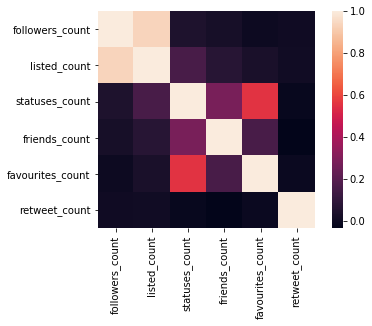

In [12]:
#Heatmap to see innate correlation between featuress
cor = features[['followers_count','listed_count','statuses_count','friends_count','favourites_count', \
                'retweet_count']].corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

Question 1 : What is the correlation between friends_count and statuses_count?

In [53]:
cor["friends_count"]["statuses_count"]

0.2823095548412404

In [13]:
#Create dictionary of all tweets
tweet_dictionary = {}
i = 0
for line in features.text:
        tweet_dictionary[i] = line.lower()
        i += 1
print(tweet_dictionary[1])

b"@canar mercedes-benz didn't even revert. just another bit of nonsense that somehow got published. ethics. #gamergate #notyourshield"


# Data Preprocessing for Sentiment Analysis

Remove HTML Links

In [14]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

In [15]:
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=strip_links(tweet_dictionary[i])

Expand contractions

In [16]:
#code source is http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "i'm": "i am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    text = c_re.sub(replace, text.lower())
    return text

In [17]:
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=expandContractions(tweet_dictionary[i])


Remove mentions

In [18]:
def strip_mentions(text):
    entity_prefixes = ['@']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [19]:
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=strip_mentions(tweet_dictionary[i])

Remove hashtags

In [20]:
def strip_hashtags(text):
    entity_prefixes = ['#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [23]:
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=strip_hashtags(tweet_dictionary[i])

Remove retweet (RT) designation

In [24]:
for i in range(0,len(tweet_dictionary)):
    if tweet_dictionary[i].startswith("b rt"):
        tweet_dictionary[i] = tweet_dictionary[i][4:]
    else:
        tweet_dictionary[i] = tweet_dictionary[i][2:]

In [25]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [26]:
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_special_characters(tweet_dictionary[i], 
                          remove_digits=True)

# Sentiment

Question 2: What is the highest compound score sentence you can make with less than 10 words?

In [44]:
snt = analyser.polarity_scores('I am Happy Cheerful I love her')
snt

{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'compound': 0.9081}

Analysis on data set using VADER

In [45]:
for i in range(0,len(features)):
    snt = analyser.polarity_scores(tweet_dictionary[i])
    features.at[i,'vader_comp'] = snt['compound']
    features.at[i,'vader_pos'] = snt['pos']
    features.at[i,'vader_neu'] = snt['neu']
    features.at[i,'vader_neg'] = snt['neg']

In [46]:
num_tweets= len(features)
vad_num_pos = len(features[features['vader_comp']>.1])
vad_num_neg = len(features[features['vader_comp']< -.1])
vad_num_neu = len(features[(features['vader_comp']< .1) & (features['vader_comp']>-.1)])

print('According to VADER, there are %d tweets, of which %d are positive and %d are negative while %d tweets are neutral' 
      %(num_tweets,vad_num_pos,vad_num_neg,vad_num_neu))

According to VADER, there are 104914 tweets, of which 32117 are positive and 40250 are negative while 32547 tweets are neutral


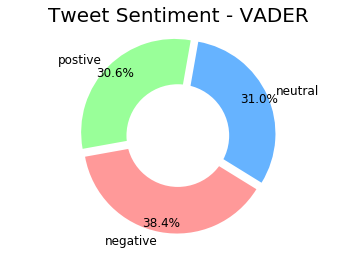

In [47]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['postive','negative','neutral']
sizes = [vad_num_pos,vad_num_neg,vad_num_neu]
colors = ['#99ff99','#ff9999','#66b3ff']
explode = (0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=80, pctdistance=.9, explode = explode,textprops={'fontsize': 12})
#draw circle
centre_circle = plt.Circle((0,0),0.55,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Tweet Sentiment - VADER', size = 20)
plt.axis('equal')  

plt.show()

Question 3: What is the friends_count of the user who had the most negative text?

In [48]:
most_negative = min(features['vader_comp'])
most_negative
v = features['vader_comp'] == most_negative
features[v]

followers_count  listed_count  statuses_count  friends_count  \
71292            10480           200          216373            916   

       favourites_count                                               text  \
71292             93378  b'you just cant stop #Gamergate \xd0\xbf\xd0\x...   

       retweet_count  vader_comp  vader_pos  vader_neu  vader_neg  
71292              0     -0.9944      0.025      0.229      0.745

# Data Preprocessing for Topic Modeling

In [49]:
#Stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_stopwords(tweet_dictionary[i])


#Create corupus of all words
words_corpus = []
for i in range(0,len(tweet_dictionary)):
        words_corpus.append([word for word in tweet_dictionary[i].lower().split() if len(word)>3])

dictionary = corpora.Dictionary(words_corpus)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

corpus_bow = [dictionary.doc2bow(text) for text in words_corpus]

#Term Frequency - Inverse Document Frequency

from gensim import corpora, models
tfidf = models.TfidfModel(corpus_bow)
corpus_tfidf = tfidf[corpus_bow]

# Topic Modeling

Topic modeling using TF-IDF

In [51]:
#Only 3 topics this time for simplicity
num_topics = 3
lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=5, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.034*"right" + 0.029*"mergate" + 0.021*"notyourshield" + 0.009*"member" + 0.008*"group" + 0.008*"women" + 0.007*"know" + 0.007*"sexist" + 0.006*"human" + 0.006*"horrible"
Topic: 1 Word: 0.007*"want" + 0.007*"show" + 0.007*"like" + 0.006*"people" + 0.006*"bullying" + 0.006*"support" + 0.006*"gamer" + 0.005*"company" + 0.005*"respect" + 0.005*"mergate"
Topic: 2 Word: 0.008*"harassment" + 0.007*"even" + 0.007*"anti" + 0.007*"woman" + 0.006*"mergate" + 0.006*"doxxing" + 0.005*"read" + 0.005*"fucking" + 0.005*"stand" + 0.005*"people"


Question 4: What would you name the 3 topics?

0: Sexism
1: Bullying
2: Harassment

In [54]:
#assign the hightest scoring topic to each tweet
for i in features.index:
    features.at[i,'topic']=sorted(lda_model_tfidf[corpus_bow[i]], key=lambda tup: -1*tup[1])[0][0]

In [55]:
#plot the sentiment distribution of tweets by topics
def make_chart(positve, negative, neutral,source):
    # Pie chart
    labels = ['positive','negative','neutral']
    sizes = [positve, negative, neutral]
    colors = ['#99ff99','#ff9999','#66b3ff']
    explode = (0.05,0.05,0.05)
    plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=80, pctdistance=.9, explode = explode,textprops={'fontsize': 12})
    #draw circle
    centre_circle = plt.Circle((0,0),0.55,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Sentiment Distribution for Topic '+str(source), size = 20)
    plt.axis('equal')  



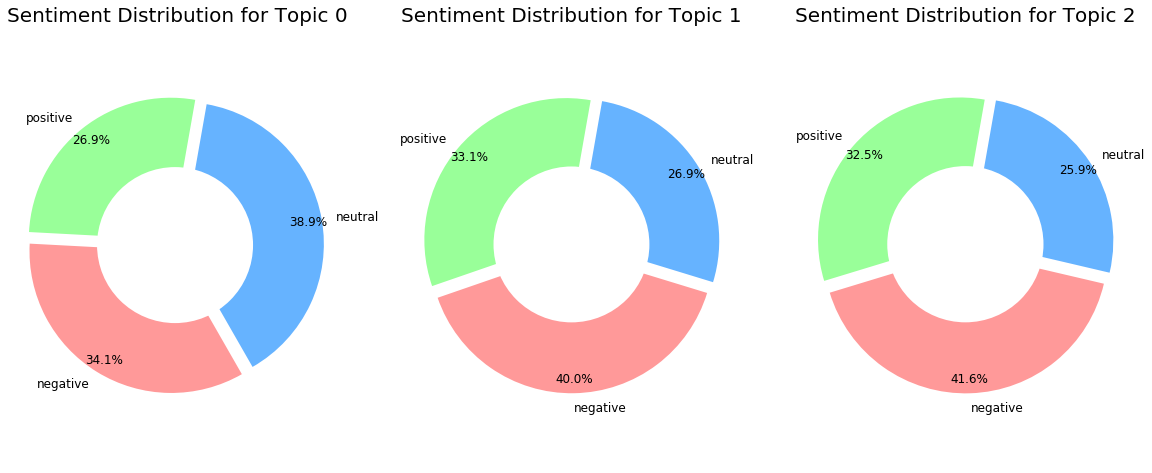

In [56]:
#Some topics are more positive / negative than others
topic=list(range(0,num_topics))
plt.figure(figsize=(20, 8))

for i in topic:
    plt.subplot(1, num_topics, i+1)
    topic_tweets=features[features['topic']==i]
    num_pos = len(topic_tweets[topic_tweets['vader_comp']>.1])
    num_neg = len(topic_tweets[topic_tweets['vader_comp']< -.1])
    num_neu = len(topic_tweets[(topic_tweets['vader_comp']< .1) & (topic_tweets['vader_comp']>-.1)])
    make_chart(num_pos,num_neg,num_neu,i)


plt.show()

Question 5: Which topic has the most negative tweets? Why do you think that is based on the topic labels you proposed?

In [58]:
max_neg = float("-inf")
max_topic = -1
for i in topic:
    topic_tweets=features[features['topic']==i]
    num_neg = len(topic_tweets[topic_tweets['vader_comp']< -.1])
    if(num_neg > max_neg):
        max_neg = num_neg
        max_topic = i

print("Topic:", max_topic)
print("Number of negative tweets:", max_neg)

Topic: 2
Number of negative tweets: 14349


# Mini Research Questions

Spend the remainder of class working as a group to address one of the following questions. At 3:45 pm, post your final notebook to the 'checkpoint' channel is Slack. One notebook per group and name it with your group number.

1. Determine a way to infer gender from the text and highlight any significant differences you see between the sets. (you can do binary or non-binary)

Characterize the themes of the gamergate controversy. What are they?
    2. Use topic modeling and NER techniques to characterize the discussion.
    3. Apply one of the clustering techniques discussed in class to identify groups of users in the dataset.
Infer the location of users in the dataset.
    4. Using the gamergate data already introduced in class.
    5. Collect a dataset of tweets containing keywords that you define within 5 miles of USC. Build a classifier to infer sentiment.